<a href="https://colab.research.google.com/github/gyu-bin/mid_first_team/blob/mgb_project/%EC%9E%AC%EC%83%9D%EC%97%90%EB%84%88%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
from matplotlib.font_manager import FontProperties
from IPython.display import HTML as html_print
from termcolor import colored
from scipy import stats

In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df_3 = pd.read_csv("/content/03 modern-renewable-prod.csv")

In [ ]:
df_3.head()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000,0.310,0.000,0.000
1,Afghanistan,AFG,2001,0.000,0.500,0.000,0.000
2,Afghanistan,AFG,2002,0.000,0.560,0.000,0.000
3,Afghanistan,AFG,2003,0.000,0.630,0.000,0.000
4,Afghanistan,AFG,2004,0.000,0.560,0.000,0.000


In [ ]:
df_3.tail()

,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000,3.970,0.010,0.320
8847,Zimbabwe,ZWE,2018,0.000,5.050,0.020,0.390
8848,Zimbabwe,ZWE,2019,0.000,4.170,0.030,0.380
8849,Zimbabwe,ZWE,2020,0.000,3.810,0.030,0.350
8850,Zimbabwe,ZWE,2021,0.000,4.000,0.040,0.380


In [ ]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def display_head_and_tail(dataframe, head=5):
    display(dataframe.head(head).style.set_caption("Head"))
    display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
    na_df = dataframe.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA']
    display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def check_df(dataframe, head=5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Head & Tail')
    display_head_and_tail(dataframe, head)
    print_section_title('NA Values')
    display_na(dataframe)
    print_section_title('Quantiles')
    display_quantiles(dataframe)

check_df(df_3)

Shape
(8851, 7)
Types
Head & Tail


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000000,0.310000,0.000000,0.000000
1,Afghanistan,AFG,2001,0.000000,0.500000,0.000000,0.000000
2,Afghanistan,AFG,2002,0.000000,0.560000,0.000000,0.000000
3,Afghanistan,AFG,2003,0.000000,0.630000,0.000000,0.000000
4,Afghanistan,AFG,2004,0.000000,0.560000,0.000000,0.000000


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000000,3.970000,0.010000,0.320000
8847,Zimbabwe,ZWE,2018,0.000000,5.050000,0.020000,0.390000
8848,Zimbabwe,ZWE,2019,0.000000,4.170000,0.030000,0.380000
8849,Zimbabwe,ZWE,2020,0.000000,3.810000,0.030000,0.350000
8850,Zimbabwe,ZWE,2021,0.000000,4.000000,0.040000,0.380000


NA Values


,Column,Number of NA
0,Entity,0
1,Code,1555
2,Year,0
3,Electricity from wind (TWh),175
4,Electricity from hydro (TWh),11
5,Electricity from solar (TWh),168
6,Other renewables including bioenergy (TWh),220


Quantiles


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Year,8851.00,1999.91,15.75,1965.00,1965.00,1969.00,2004.00,2020.00,2021.00,2022.00,2022.00
Electricity from wind (TWh),8676.00,14.57,86.39,0.00,0.00,0.00,0.00,35.82,433.23,1848.26,1848.26
Electricity from hydro (TWh),8840.00,116.58,360.23,0.00,0.00,0.00,3.53,697.49,1861.13,4340.61,4340.61
Electricity from solar (TWh),8683.00,5.28,40.10,0.00,0.00,0.00,0.00,5.33,158.19,1040.50,1040.50
Other renewables including bioenergy (TWh),8631.00,12.24,48.35,0.00,0.00,0.00,0.02,76.41,243.76,761.93,761.93


In [ ]:
df_3 = df_3.drop(columns=['Code'])

In [ ]:
df_3.head()

,Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,2000,0.000,0.310,0.000,0.000
1,Afghanistan,2001,0.000,0.500,0.000,0.000
2,Afghanistan,2002,0.000,0.560,0.000,0.000
3,Afghanistan,2003,0.000,0.630,0.000,0.000
4,Afghanistan,2004,0.000,0.560,0.000,0.000


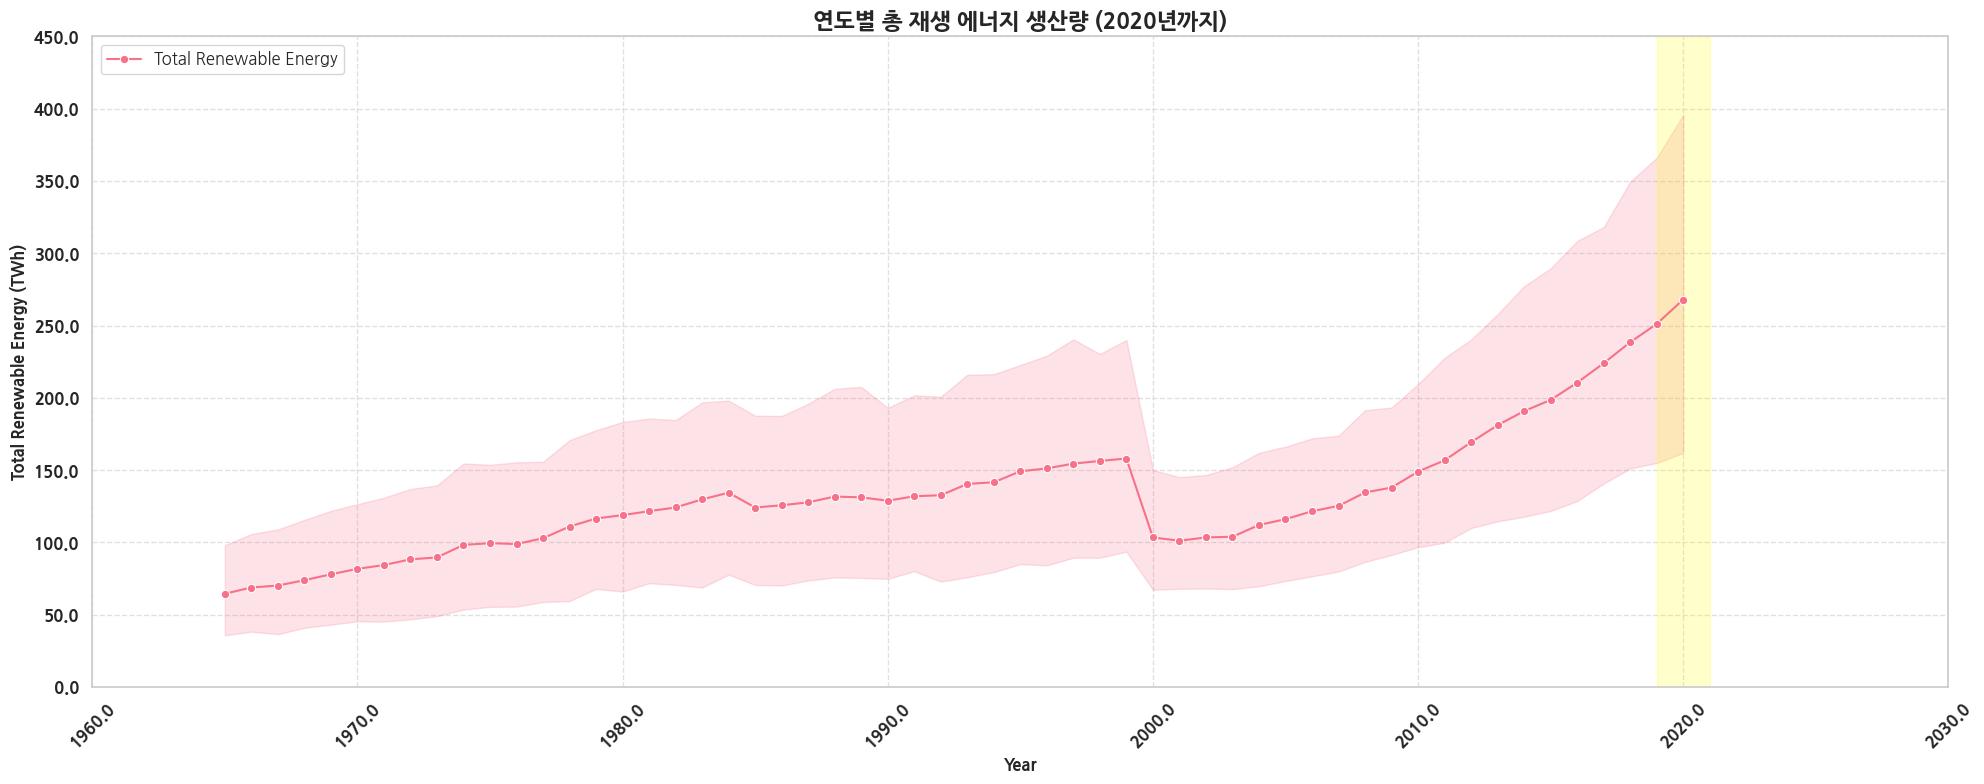

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm
import koreanize_matplotlib  # (선택) 이 라이브러리를 쓰면 한글 폰트 자동 설정

# Colab에서 한글 폰트 설치 (이미 설치했으면 생략)
# !apt-get update -qq
# !apt-get install fonts-nanum -qq

# Seaborn, Matplotlib 설정
sns.set_theme(style="whitegrid")
plt.rcParams['axes.unicode_minus'] = False

# 원하는 폰트(예: NanumGothic) 사용
plt.rc('font', family='NanumGothic')

########################################
# 1. df_3 전처리: 2020년까지 필터링
########################################
# 예: df_3에 'Year' 열이 있고, 4개 재생에너지 열이 있다고 가정
df_3 = df_3[df_3['Year'] <= 2020].copy()

# 총 재생에너지 생산량(TWh) 계산
df_3['Total Renewable (TWh)'] = df_3[[
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]].sum(axis=1)

colors = sns.color_palette("husl")

########################################
# 2. 시각화
########################################
fig, ax = plt.subplots(figsize=(20, 8))

# 라인플롯
sns.lineplot(
    x='Year',
    y='Total Renewable (TWh)',
    data=df_3,
    marker='o',
    color=colors[0],
    ax=ax,
    label='Total Renewable Energy'
)

# 최대값 지점 찾아 주석 달기
max_point = df_3[df_3['Total Renewable (TWh)'] == df_3['Total Renewable (TWh)'].max()]
max_year = max_point['Year'].values[0]
max_val = max_point['Total Renewable (TWh)'].values[0]

ax.annotate(
    f"Max: {max_year}",
    xy=(max_year, max_val),
    xytext=(-50, 50),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->', color='black', lw=1),
    fontsize=12
)

# 그래프 제목, 축 라벨
plt.title('연도별 총 재생 에너지 생산량 (2020년까지)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Renewable Energy (TWh)', fontsize=12, fontweight='bold')

# 그리드, 범례
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# 최대값 주변(±1년) 강조 영역
ax.axvspan(max_year - 1, max_year + 1, alpha=0.2, color='yellow')

# 폰트 설정
font = FontProperties()
font.set_weight('bold')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontproperties=font)
ax.set_yticklabels(ax.get_yticks(), fontproperties=font)

# 축 라벨 각도, 크기
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


그래프 분석: 이 그래프는 풍력, 수력, 태양광 및 기타 재생 가능 에너지원의 총 기여도를 보여주는 재생 에너지의 연간 총 생산량을 나타냅니다. 이 그래프는 생산량이 가장 높은 해를 강조하며, 명확성을 위해 주석과 화살표로 강조합니다. 이 그래프의 설계는 재생 에너지 생산의 중요한 추세와 피벗 포인트를 효과적으로 표면화하여 장기적인 에너지 전략을 위한 분석적 기반을 제공합니다.
분홍색 음영: 신뢰구간(Confidence Interval)
노란색 세로 영역: 최대값 관측 연도를 중심으로 ±1년 범위를 강조하기 위한 시각적 하이라이트

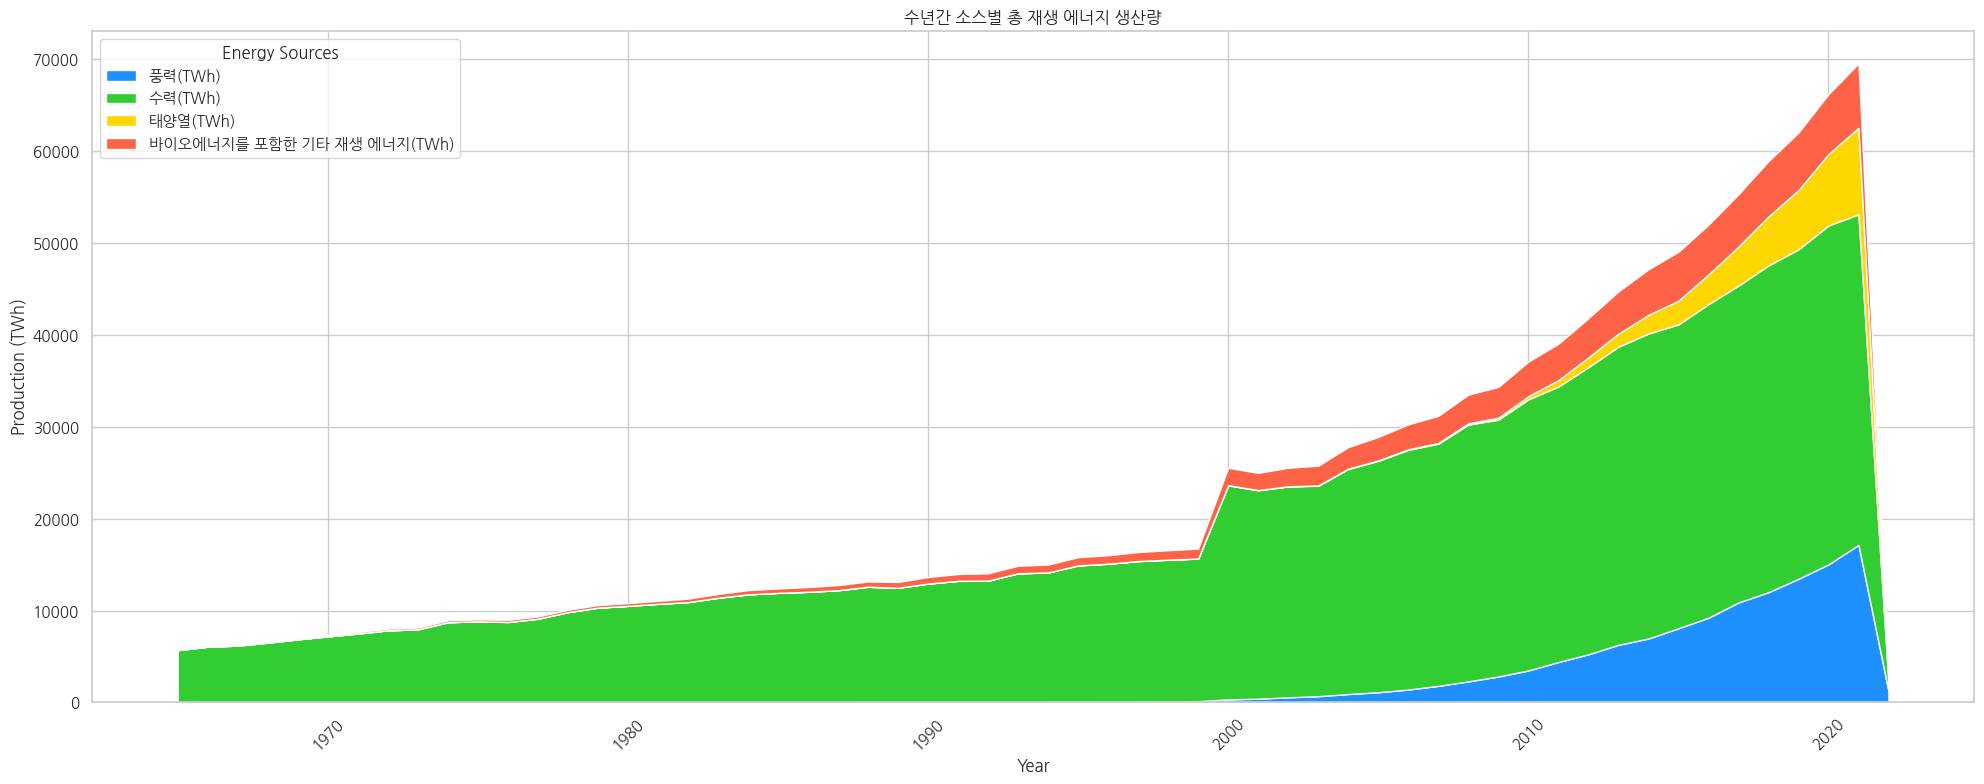

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm
import koreanize_matplotlib  # (선택) 이 라이브러리를 쓰면 한글 폰트 자동 설정

# Colab에서 한글 폰트 설치 (이미 설치했으면 생략)
# !apt-get update -qq
# !apt-get install fonts-nanum -qq

# Seaborn, Matplotlib 설정
sns.set_theme(style="whitegrid")
plt.rcParams['axes.unicode_minus'] = False

# 원하는 폰트(예: NanumGothic) 사용
plt.rc('font', family='NanumGothic')

energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_by_source_yearly = df_3.groupby('Year')[energy_types].sum().reset_index()

colors = ['dodgerblue', 'limegreen', 'gold', 'tomato']

plt.figure(figsize=(20, 8))

plt.stackplot(total_renewable_by_source_yearly['Year'],
              total_renewable_by_source_yearly['Electricity from wind (TWh)'],
              total_renewable_by_source_yearly['Electricity from hydro (TWh)'],
              total_renewable_by_source_yearly['Electricity from solar (TWh)'],
              total_renewable_by_source_yearly['Other renewables including bioenergy (TWh)'],
              labels=['풍력(TWh)', '수력(TWh)', '태양열(TWh)', '바이오에너지를 포함한 기타 재생 에너지(TWh)'], colors=colors)

plt.title('수년간 소스별 총 재생 에너지 생산량')
plt.xlabel('Year')
plt.ylabel('Production (TWh)')
plt.legend(loc='upper left', title='Energy Sources')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

그래프 분석: 이 스택 영역 그래프는 풍력, 수력, 태양광, 바이오 에너지를 포함한 에너지원별로 연간 총 재생 에너지 생산량을 나타냅니다. 색상별 데이터를 계층화하면 각 에너지원이 전체에 기여하는 비율과 시간이 지남에 따라 어떻게 진화했는지 명확하게 시각적으로 표현할 수 있습니다. 각 에너지 유형에 따라 고유한 색상을 사용하면 전체 에너지 믹스에서 각 재생 가능 에너지원의 추세와 중요성이 커지는 것을 쉽게 식별할 수 있습니다. 이 시각화는 각 재생 가능 에너지원의 영향을 평가하고 지속 가능한 에너지를 위한 정책 개발을 안내하는 데 중요합니다

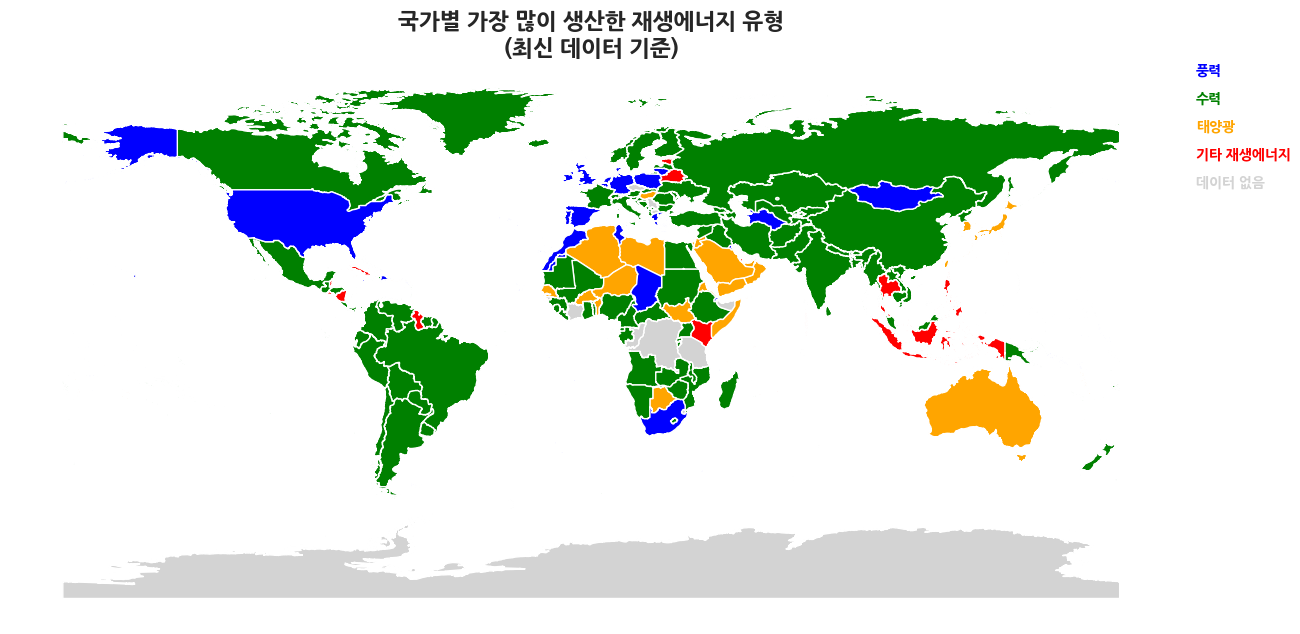

그래프 분석: 이 지리 공간 시각화는 최신 데이터를 기반으로 각 국가에서 가장 많이 사용되는 재생 에너지원을 매핑합니다.
이 지도는 각 지역에서 주로 사용되는 재생 에너지 유형을 나타내도록 색상으로 구분되어 있습니다: 파란색은 풍력, 녹색은 수력, 주황색은 태양광, 빨간색은 기타 재생 에너지원입니다.
데이터가 없거나 데이터가 부족한 국가는 연한 회색으로 표시되어 있습니다. 
이 시각화 도구는 지리적 추세와 지역 의존성을 강조하면서 재생 에너지 선호도에 대한 글로벌 관점을 제공합니다.
이 도구는 다양한 에너지 환경을 강조하고 특정 유형의 재생 에너지에서 성장 가능성이 있는 지역을 식별하는 데 도움이 됩니다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

#############################################
# 1. CSV 파일 불러오기 및 전처리
#############################################
df = pd.read_csv('/content/03 modern-renewable-prod.csv')
df.columns = df.columns.str.strip()  # 컬럼명 앞뒤 공백 제거

# 주요 열: "Entity", "Year" 및 재생에너지 생산량 관련 열
energy_types = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]

# 숫자형 변환 및 결측치 처리
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
for col in energy_types:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        df[col] = 0

# 각 국가(Entity)별 최신 연도 데이터 선택
latest_data = df.sort_values('Year').groupby('Entity').last().reset_index()

# 각 국가에서 가장 많이 생산한 재생에너지 유형 결정
latest_data['Most Used Renewable Source'] = latest_data[energy_types].idxmax(axis=1)

# 색상 매핑 (풍력: 파란색, 수력: 초록, 태양광: 주황, 기타 재생: 빨강)
color_map = {
    'Electricity from wind (TWh)': 'blue',
    'Electricity from hydro (TWh)': 'green',
    'Electricity from solar (TWh)': 'orange',
    'Other renewables including bioenergy (TWh)': 'red'
}
latest_data['Color'] = latest_data['Most Used Renewable Source'].map(color_map)
latest_data['Color'] = latest_data['Color'].fillna('lightgrey')

#############################################
# 2. 세계 지도 데이터 불러오기 (대체 GeoJSON 사용)
#############################################
# datasets/geo-countries의 GeoJSON 파일 사용 (국가 이름은 'ADMIN'에 있음)
url_geojson = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url_geojson)
# 'ADMIN' 열을 'name'으로 변경
world.rename(columns={'ADMIN': 'name'}, inplace=True)

#############################################
# 3. 국가 이름 매핑 및 데이터 병합
#############################################
# 국가 이름이 다를 수 있으므로 치환 (예: "United States of America" -> "United States")
name_mapping = {
    "United States of America": "United States",
    "Russian Federation": "Russia",
    "Republic of Korea": "South Korea",
    "Korea": "South Korea",
    "Iran (Islamic Republic of)": "Iran",
    # 필요에 따라 추가
}
world['name'] = world['name'].replace(name_mapping)

# 최신 재생에너지 생산 데이터의 'Entity'와 세계 지도 'name'을 기준으로 병합
merged = world.set_index('name').join(latest_data.set_index('Entity'))
merged['Color'] = merged['Color'].fillna('lightgrey')

#############################################
# 4. 지도 시각화 및 범례 추가
#############################################
def add_legend(ax):
    legend_labels = {
        'blue': '풍력',
        'green': '수력',
        'orange': '태양광',
        'red': '기타 재생에너지',
        'lightgrey': '데이터 없음'
    }
    y_offset = 0.02
    for color, label in legend_labels.items():
        ax.annotate(
            label,
            xy=(1.02, 1 - y_offset),
            xycoords='axes fraction',
            fontsize=10,
            color=color,
            weight='bold'
        )
        y_offset += 0.05

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(color=merged['Color'], ax=ax, legend=False)
add_legend(ax)
ax.set_title('국가별 가장 많이 생산한 재생에너지 유형\n(최신 데이터 기준)', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.show()


print('그래프 분석: 이 지리 공간 시각화는 최신 데이터를 기반으로 각 국가에서 가장 많이 사용되는 재생 에너지원을 매핑합니다.')
print('이 지도는 각 지역에서 주로 사용되는 재생 에너지 유형을 나타내도록 색상으로 구분되어 있습니다: 파란색은 풍력, 녹색은 수력, 주황색은 태양광, 빨간색은 기타 재생 에너지원입니다.')
print('데이터가 없거나 데이터가 부족한 국가는 연한 회색으로 표시되어 있습니다. ')
print('이 시각화 도구는 지리적 추세와 지역 의존성을 강조하면서 재생 에너지 선호도에 대한 글로벌 관점을 제공합니다.')
print('이 도구는 다양한 에너지 환경을 강조하고 특정 유형의 재생 에너지에서 성장 가능성이 있는 지역을 식별하는 데 도움이 됩니다.')

<ipython-input-143-5d850800b5af>:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-143-5d850800b5af>:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-143-5d850800b5af>:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-143-5d850800b5af>:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




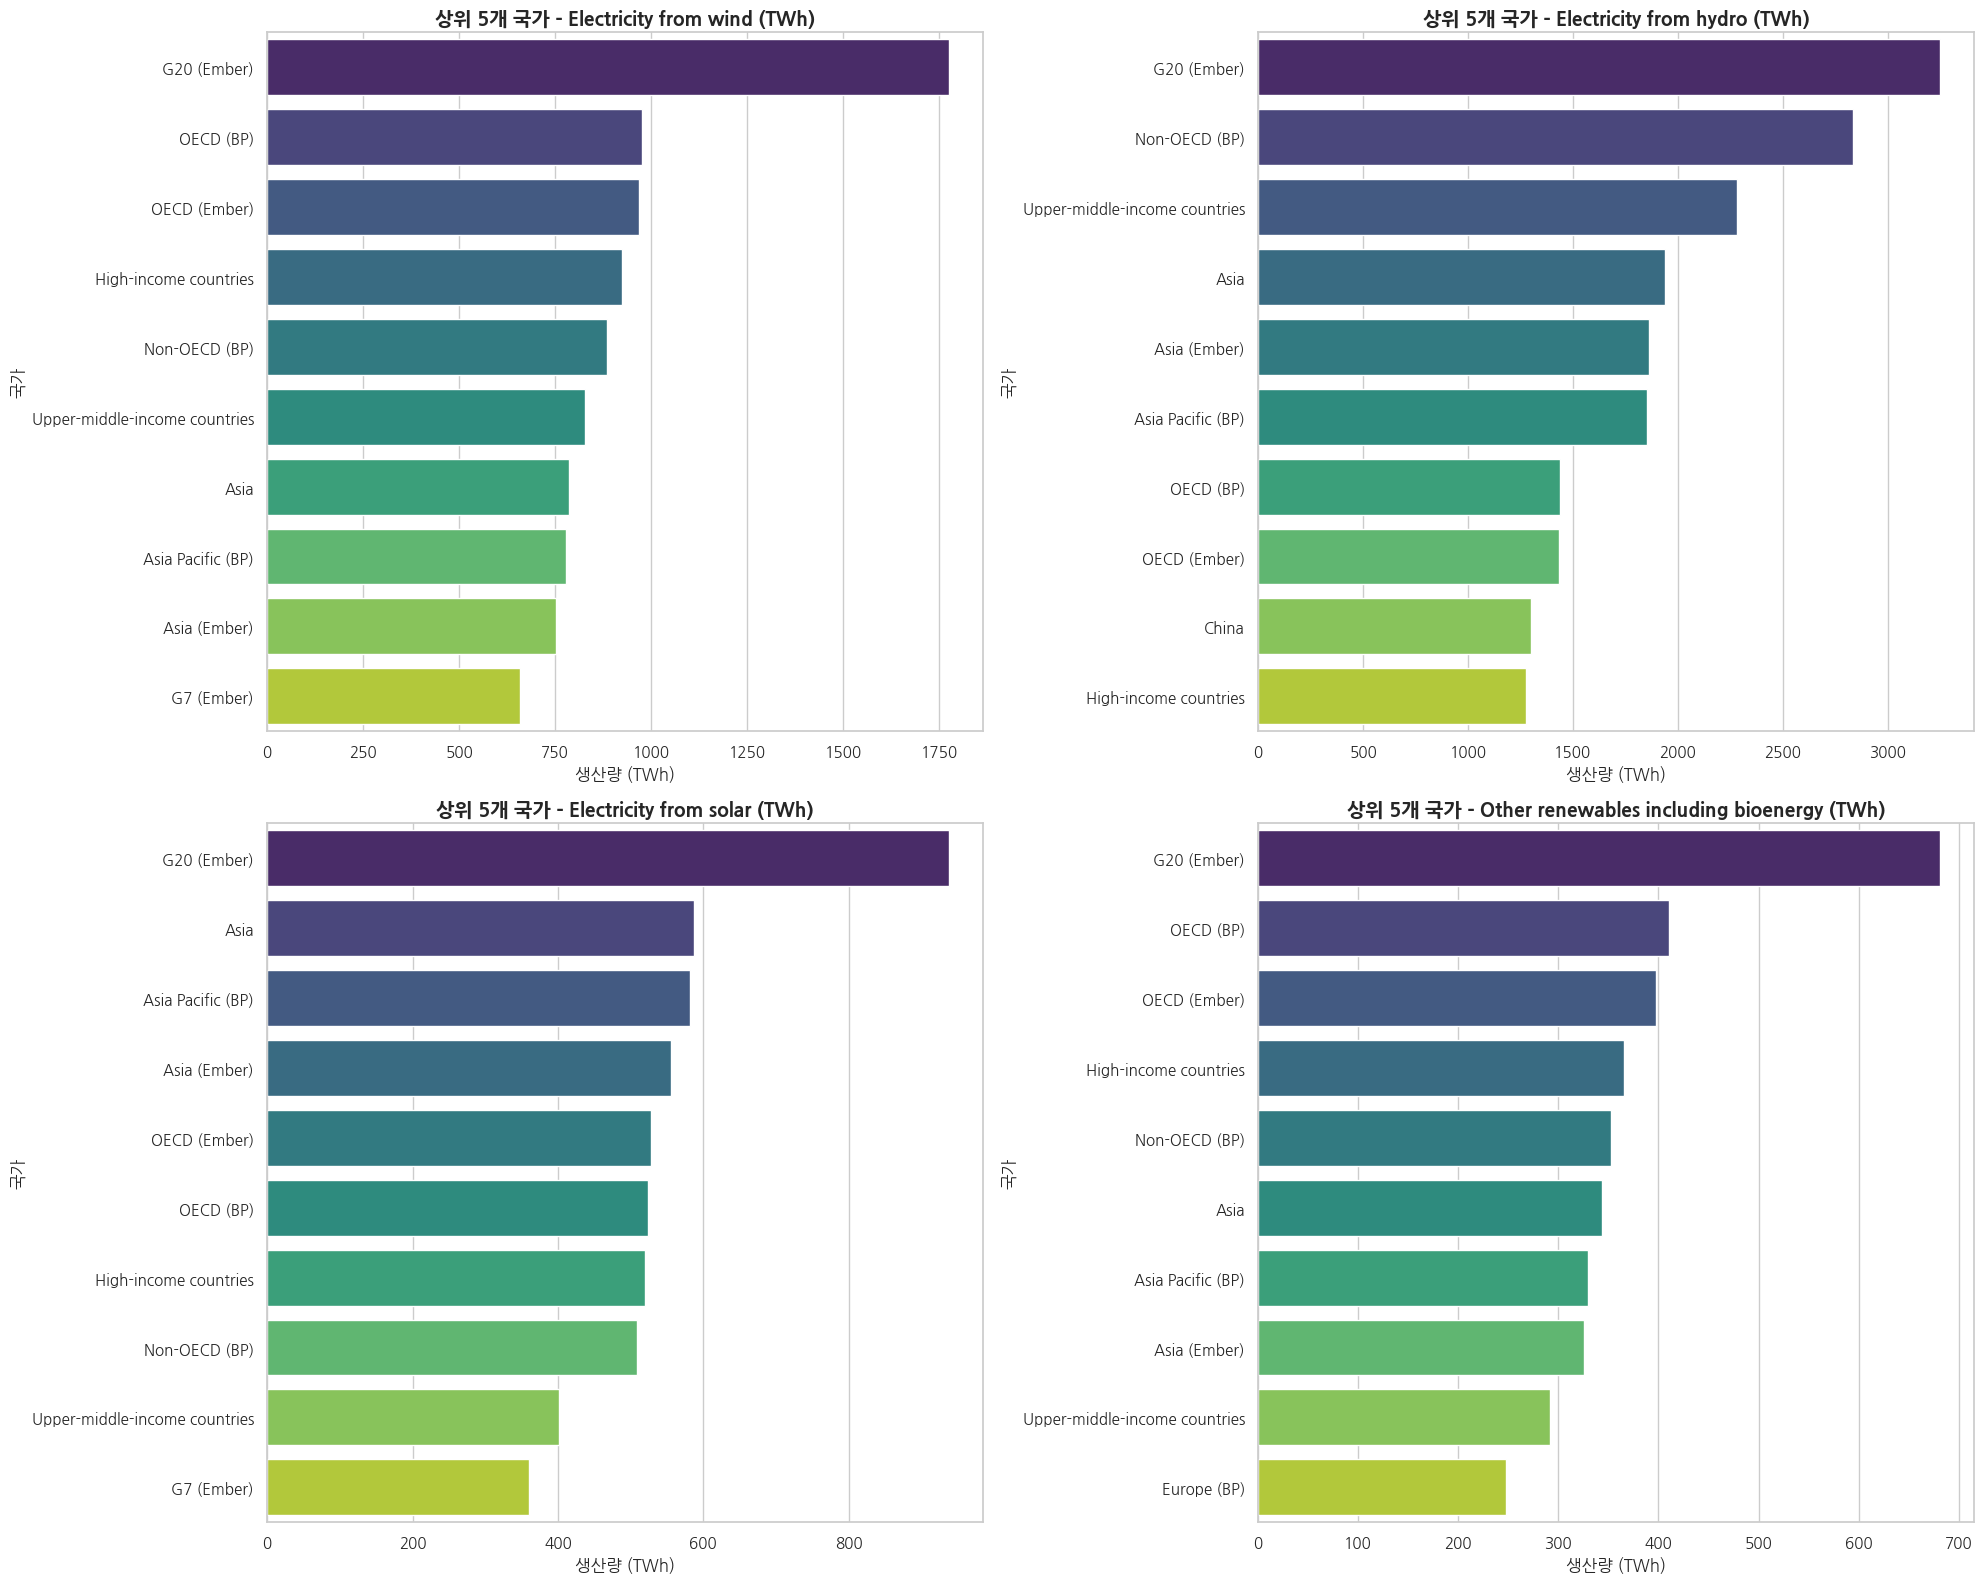

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 이미 latest_data가 존재한다고 가정
# 예: latest_data에는 'Entity' 열과 아래 4개 에너지원 열이 존재:
# 'Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
# 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)'

# 제거할 그룹/대륙/소득 항목 리스트 (실제 국가가 아닌 것들)
exclude_list = [
    "World",
]

# 1) 실제 국가만 남기기
filtered_data = latest_data[~latest_data['Entity'].isin(exclude_list)].copy()

# 2) 분석할 에너지원 열 목록
energy_types = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]

# 3) 에너지원별 상위 5개 국가 추출
top_countries_by_source = {}
for energy_type in energy_types:
    # 해당 에너지원 기준으로 내림차순 정렬 후 상위 5개 국가
    top_countries = filtered_data.sort_values(by=energy_type, ascending=False).head(10)
    top_countries_by_source[energy_type] = top_countries[['Entity', energy_type]]

# 4) 시각화 (2행 2열 서브플롯)
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for i, (energy_type, df_top) in enumerate(top_countries_by_source.items()):
    ax = axes[i]
    sns.barplot(data=df_top, x=energy_type, y='Entity', ax=ax, palette="viridis")
    ax.set_title(f'상위 5개 국가 - {energy_type}', fontsize=14, fontweight='bold')
    ax.set_xlabel('생산량 (TWh)', fontsize=12)
    ax.set_ylabel('국가', fontsize=12)

plt.tight_layout()
plt.show()

그래프 분석: 이 막대 차트 세트는 풍력, 수력, 태양광 및 기타 재생 에너지의 각 유형별 생산량 기준 상위 5개 국가를 나타냅니다. 각 차트는 하나의 에너지 유형에 전용되어 있으며, 각 재생 에너지 부문에서 선두를 달리고 있는 국가를 보여줍니다. 세로 막대는 테라와트시(TWh) 단위의 생산량을 나타내며, 각 카테고리에서 선도 국가의 기여도를 명확하게 비교할 수 있습니다. 이 시각적 비교는 재생 에너지 생산에서 우수한 국가를 강조할 뿐만 아니라 국가마다 재생 에너지에 대한 다양한 초점과 강점을 보여줍니다. 이는 글로벌 재생 에너지 역학을 이해하고 각 부문의 주요 주체를 인식하는 데 유용한 도구입니다

<ipython-input-144-d3ede564f2ac>:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-144-d3ede564f2ac>:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-144-d3ede564f2ac>:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-144-d3ede564f2ac>:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




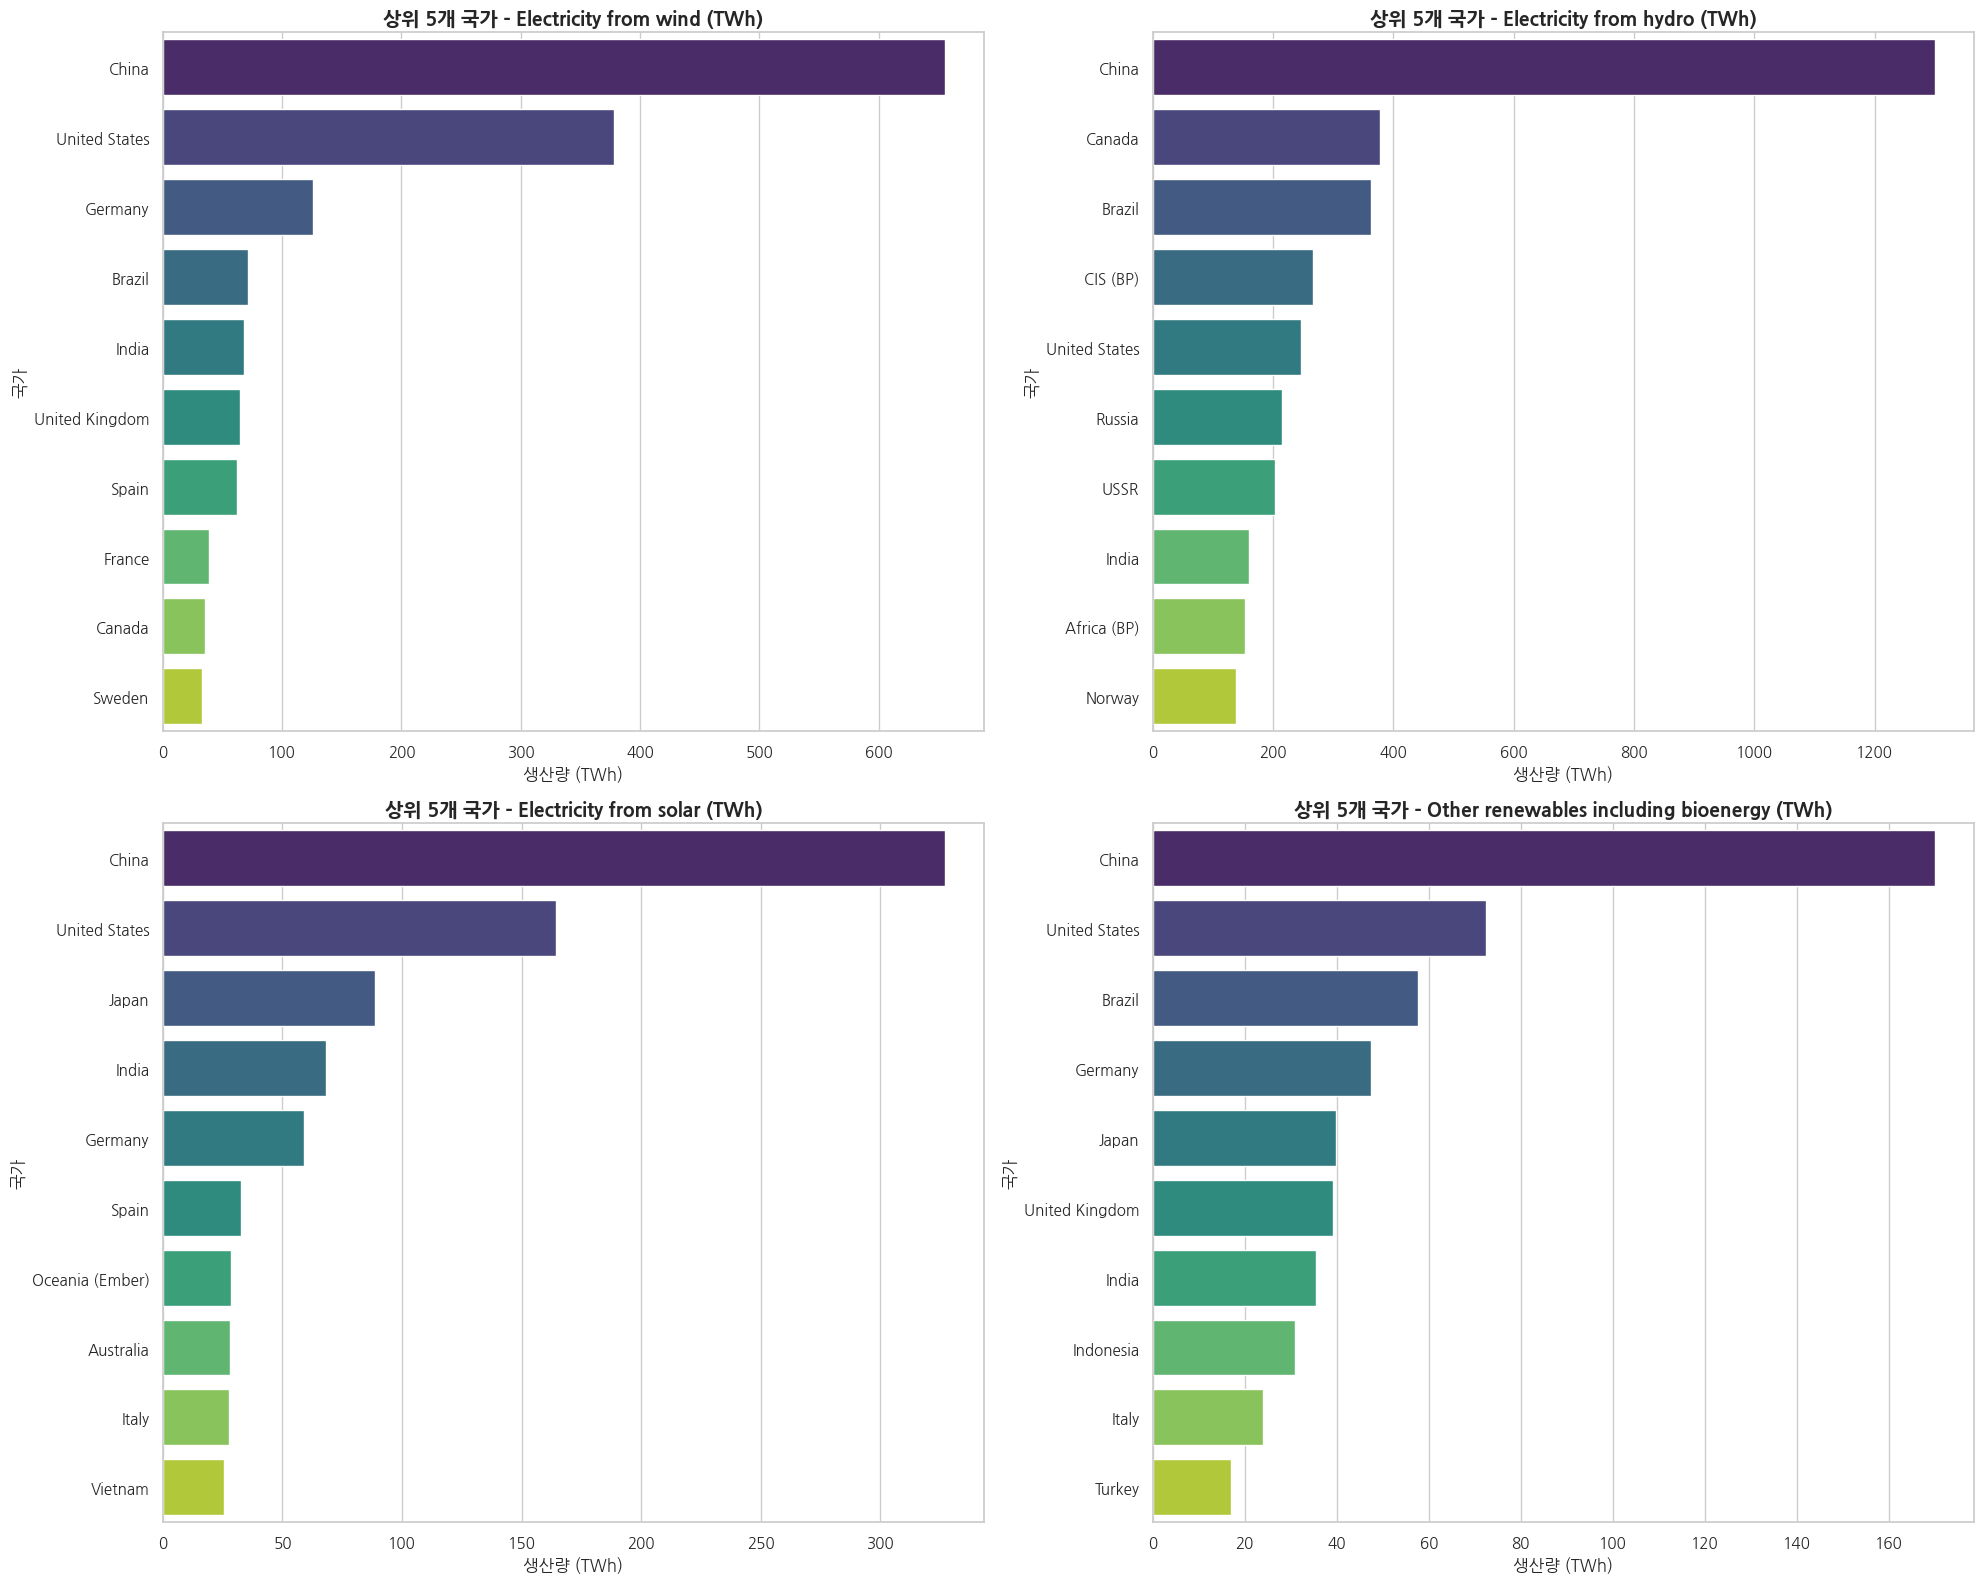

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 이미 latest_data가 존재한다고 가정
# 예: latest_data에는 'Entity' 열과 아래 4개 에너지원 열이 존재:
# 'Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
# 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)'

# 제거할 그룹/대륙/소득 항목 리스트 (실제 국가가 아닌 것들)
exclude_list = [
    "World", "G20", "OECD", "Non-OECD", "Asia Pacific",
    "Asia", "Asia (excl. China & India)",
    "Africa",
    "Europe", "Europe (excl. EU-27)", "Europe (excl. EU-28)",
    "North America", "North America (excl. USA)",
    "South America",
    "Oceania",
    "European Union (27)", "European Union (28)",
    "High-income countries", "Upper-middle-income countries",
    "Lower-middle-income countries", "Low-income countries",
    "International transport", "G20 (Ember)", "EU-27", "EU-28", "OECD (BP)",
    "OECD (Ember)", "Non-OECD (BP)", "Non-OECD (Ember)", "Asia (BP)", "Asia (Ember)",
    "Europe (BP)", "Europe (Ember)", "North America (BP)", "North America (Ember)",
    "South America (BP)", "South America (Ember)", "Oceania (BP)", "Oceania (Ember)"
    "Africa (BP)", "Africa (Ember)", "High-income", "Upper-middle-income",
    "Lower-middle-income", "Low-income", "Asia Pacific (BP)", "G7 (Ember)",
    "Asia-pacific (Ember)", "European Union (27) (Ember)", "European Union (28) (Ember)",
    "Latin America and Caribbean (Ember)", "South and Central America (BP)",
]

# 1) 실제 국가만 남기기
filtered_data = latest_data[~latest_data['Entity'].isin(exclude_list)].copy()

# 2) 분석할 에너지원 열 목록
energy_types = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]

# 3) 에너지원별 상위 5개 국가 추출
top_countries_by_source = {}
for energy_type in energy_types:
    # 해당 에너지원 기준으로 내림차순 정렬 후 상위 5개 국가
    top_countries = filtered_data.sort_values(by=energy_type, ascending=False).head(10)
    top_countries_by_source[energy_type] = top_countries[['Entity', energy_type]]

# 4) 시각화 (2행 2열 서브플롯)
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for i, (energy_type, df_top) in enumerate(top_countries_by_source.items()):
    ax = axes[i]
    sns.barplot(data=df_top, x=energy_type, y='Entity', ax=ax, palette="viridis")
    ax.set_title(f'상위 5개 국가 - {energy_type}', fontsize=14, fontweight='bold')
    ax.set_xlabel('생산량 (TWh)', fontsize=12)
    ax.set_ylabel('국가', fontsize=12)

plt.tight_layout()
plt.show()


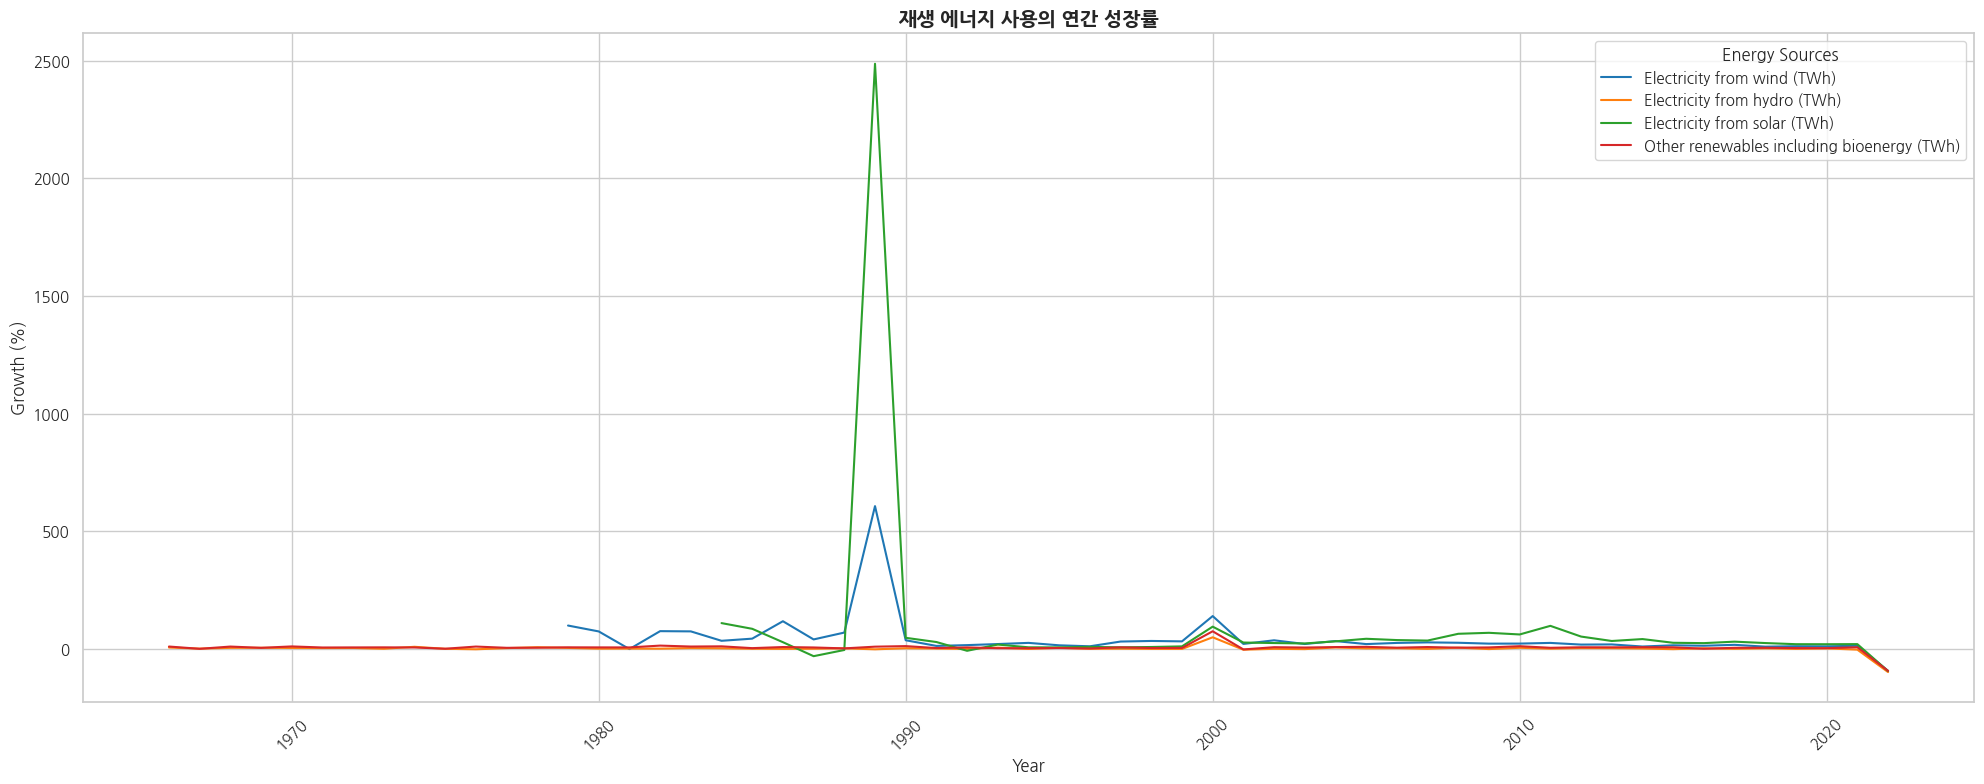

In [ ]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_comparison = df_3.groupby('Year')[energy_types].sum()
growth_rates = total_renewable_comparison.pct_change().multiply(100)

plt.figure(figsize=(20, 8))

palette = sns.color_palette("tab10", len(energy_types))

for i, energy_type in enumerate(energy_types):
    sns.lineplot(data=growth_rates, x=growth_rates.index, y=energy_type, label=energy_type, color=palette[i])

plt.title('재생 에너지 사용의 연간 성장률', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)

plt.legend(title='Energy Sources')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

그래프 분석: 이 선 그래프는 풍력, 수력, 태양광 및 바이오 에너지를 포함한 기타 재생 에너지 등 다양한 유형의 재생 에너지원의 연간 성장률을 보여줍니다. 명확성을 위해 색상으로 구분된 각 선은 전년 대비 생산량 변화율을 나타내며, 다양한 에너지 유형 간의 성장 궤적을 직접 비교할 수 있습니다. 이 그래프는 진화하는 재생 에너지 부문에 대한 역동적인 관점을 제공하여 수년간의 상당한 성장 또는 감소를 강조합니다. 이 분석은 재생 에너지 채택의 모멘텀을 이해하고 어떤 유형의 재생 에너지가 주목받거나 도전에 직면하고 있는지 파악하는 데 매우 중요합니다.



데이터 집계 방식·정의 변경

국제기구나 통계 기관에서 해당 연도 전후로 재생에너지 분류 기준이나 데이터 집계 방식을 변경했을 수 있습니다.
예: “태양광·바이오매스”를 이전까지는 집계하지 않다가, 특정 시점부터 통계에 포함하게 되어 통계상 큰 폭의 증가가 나타났을 수 있습니다.
특정 국가(또는 지역) 데이터 대규모 업데이트

예: 구소련(소비에트 연방) 해체 이후, 독립 국가들이 재생에너지 통계를 새롭게 보고하거나, 기존 통계를 대폭 수정했을 수 있습니다.
또는 독일 통일(1990년) 전후로 동독 지역 데이터가 합산되면서 일시적으로 통계상 큰 변동이 나타날 수도 있습니다.
일시적인 대형 프로젝트

특정 국가에서 대규모 수력/풍력/태양광 프로젝트가 가동되거나, 대규모 설비가 중단되는 등,
단기간에 급격한 변동을 일으키는 사건이 있을 수 있습니다.
예: 대형 댐 건설 후 수력 발전이 일시에 크게 잡혔다가, 통계 재정비로 수정치가 반영되는 경우 등.
데이터 오류(Glitch) 또는 재검토(Revisions)

통계를 보고한 국가(또는 기관)에서 이전 데이터를 재검토해, 수치를 대폭 수정했을 수 있습니다.
이 경우 특정 연도에 극단적인 값이 잡힌 뒤, 다음 해에 정정되면서 급락해 보일 수 있습니다.
정책 변화로 인한 급격한 증가·감소

어떤 국가가 보조금·정책 지원을 단기간 대규모로 시행했다가, 다음 해에 정책이 종료되면서 통계상 큰 폭의 증감이 생길 수도 있습니다.

In [ ]:
import pandas as pd
import plotly.express as px

# 선택한 국가 목록
selected_countries = ['Turkey', 'United States', 'China', 'Germany', 'Brazil', 'India', 'South Africa']

# 최신 데이터는 이미 latest_data에 있다고 가정 (Entity, Year 등 포함)
# 만약 latest_data가 없다면 아래와 같이 불러올 수 있음:
# df = pd.read_csv('/content/03 modern-renewable-prod.csv')
# df.columns = df.columns.str.strip()
# df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
# latest_data = df.sort_values('Year').groupby('Entity').last().reset_index()

# 선택한 국가 데이터 필터링
regional_data = latest_data[latest_data['Entity'].isin(selected_countries)].copy()

# 'Total Renewable (TWh)' 열 계산: 4개 열의 합계
energy_types = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]
regional_data['Total Renewable (TWh)'] = regional_data[energy_types].sum(axis=1)

# 막대 차트 생성
fig = px.bar(regional_data, x='Entity', y='Total Renewable (TWh)', color='Entity',
             title='지역 재생 에너지 생산',
             labels={'Entity': 'Country', 'Total Renewable (TWh)': '총 재생 에너지 발전량(TWh)'})
fig.show()


'그래프 분석: 이 막대 차트는 튀르키예, 미국, 중국, 독일, 브라질, 인도, 남아프리카공화국 등 일부 국가의 총 재생 에너지 발전량을 테라와트시(TWh) 단위로 표시합니다.
'각 국가는 서로 다른 색상으로 표시되어 있어 각 국가의 에너지 생산량을 쉽게 구분할 수 있습니다.
'이 차트는 재생 에너지에 대한 각국의 기여도를 비교하여 재생 에너지 부문의 변화와 규모를 강조합니다.'
'이는 주요 지역의 재생 에너지 환경을 이해하고 지속 가능한 에너지 분야에서 선도적인 및 신흥 플레이어를 식별하는 데 효과적인 시각적 도구입니다.'

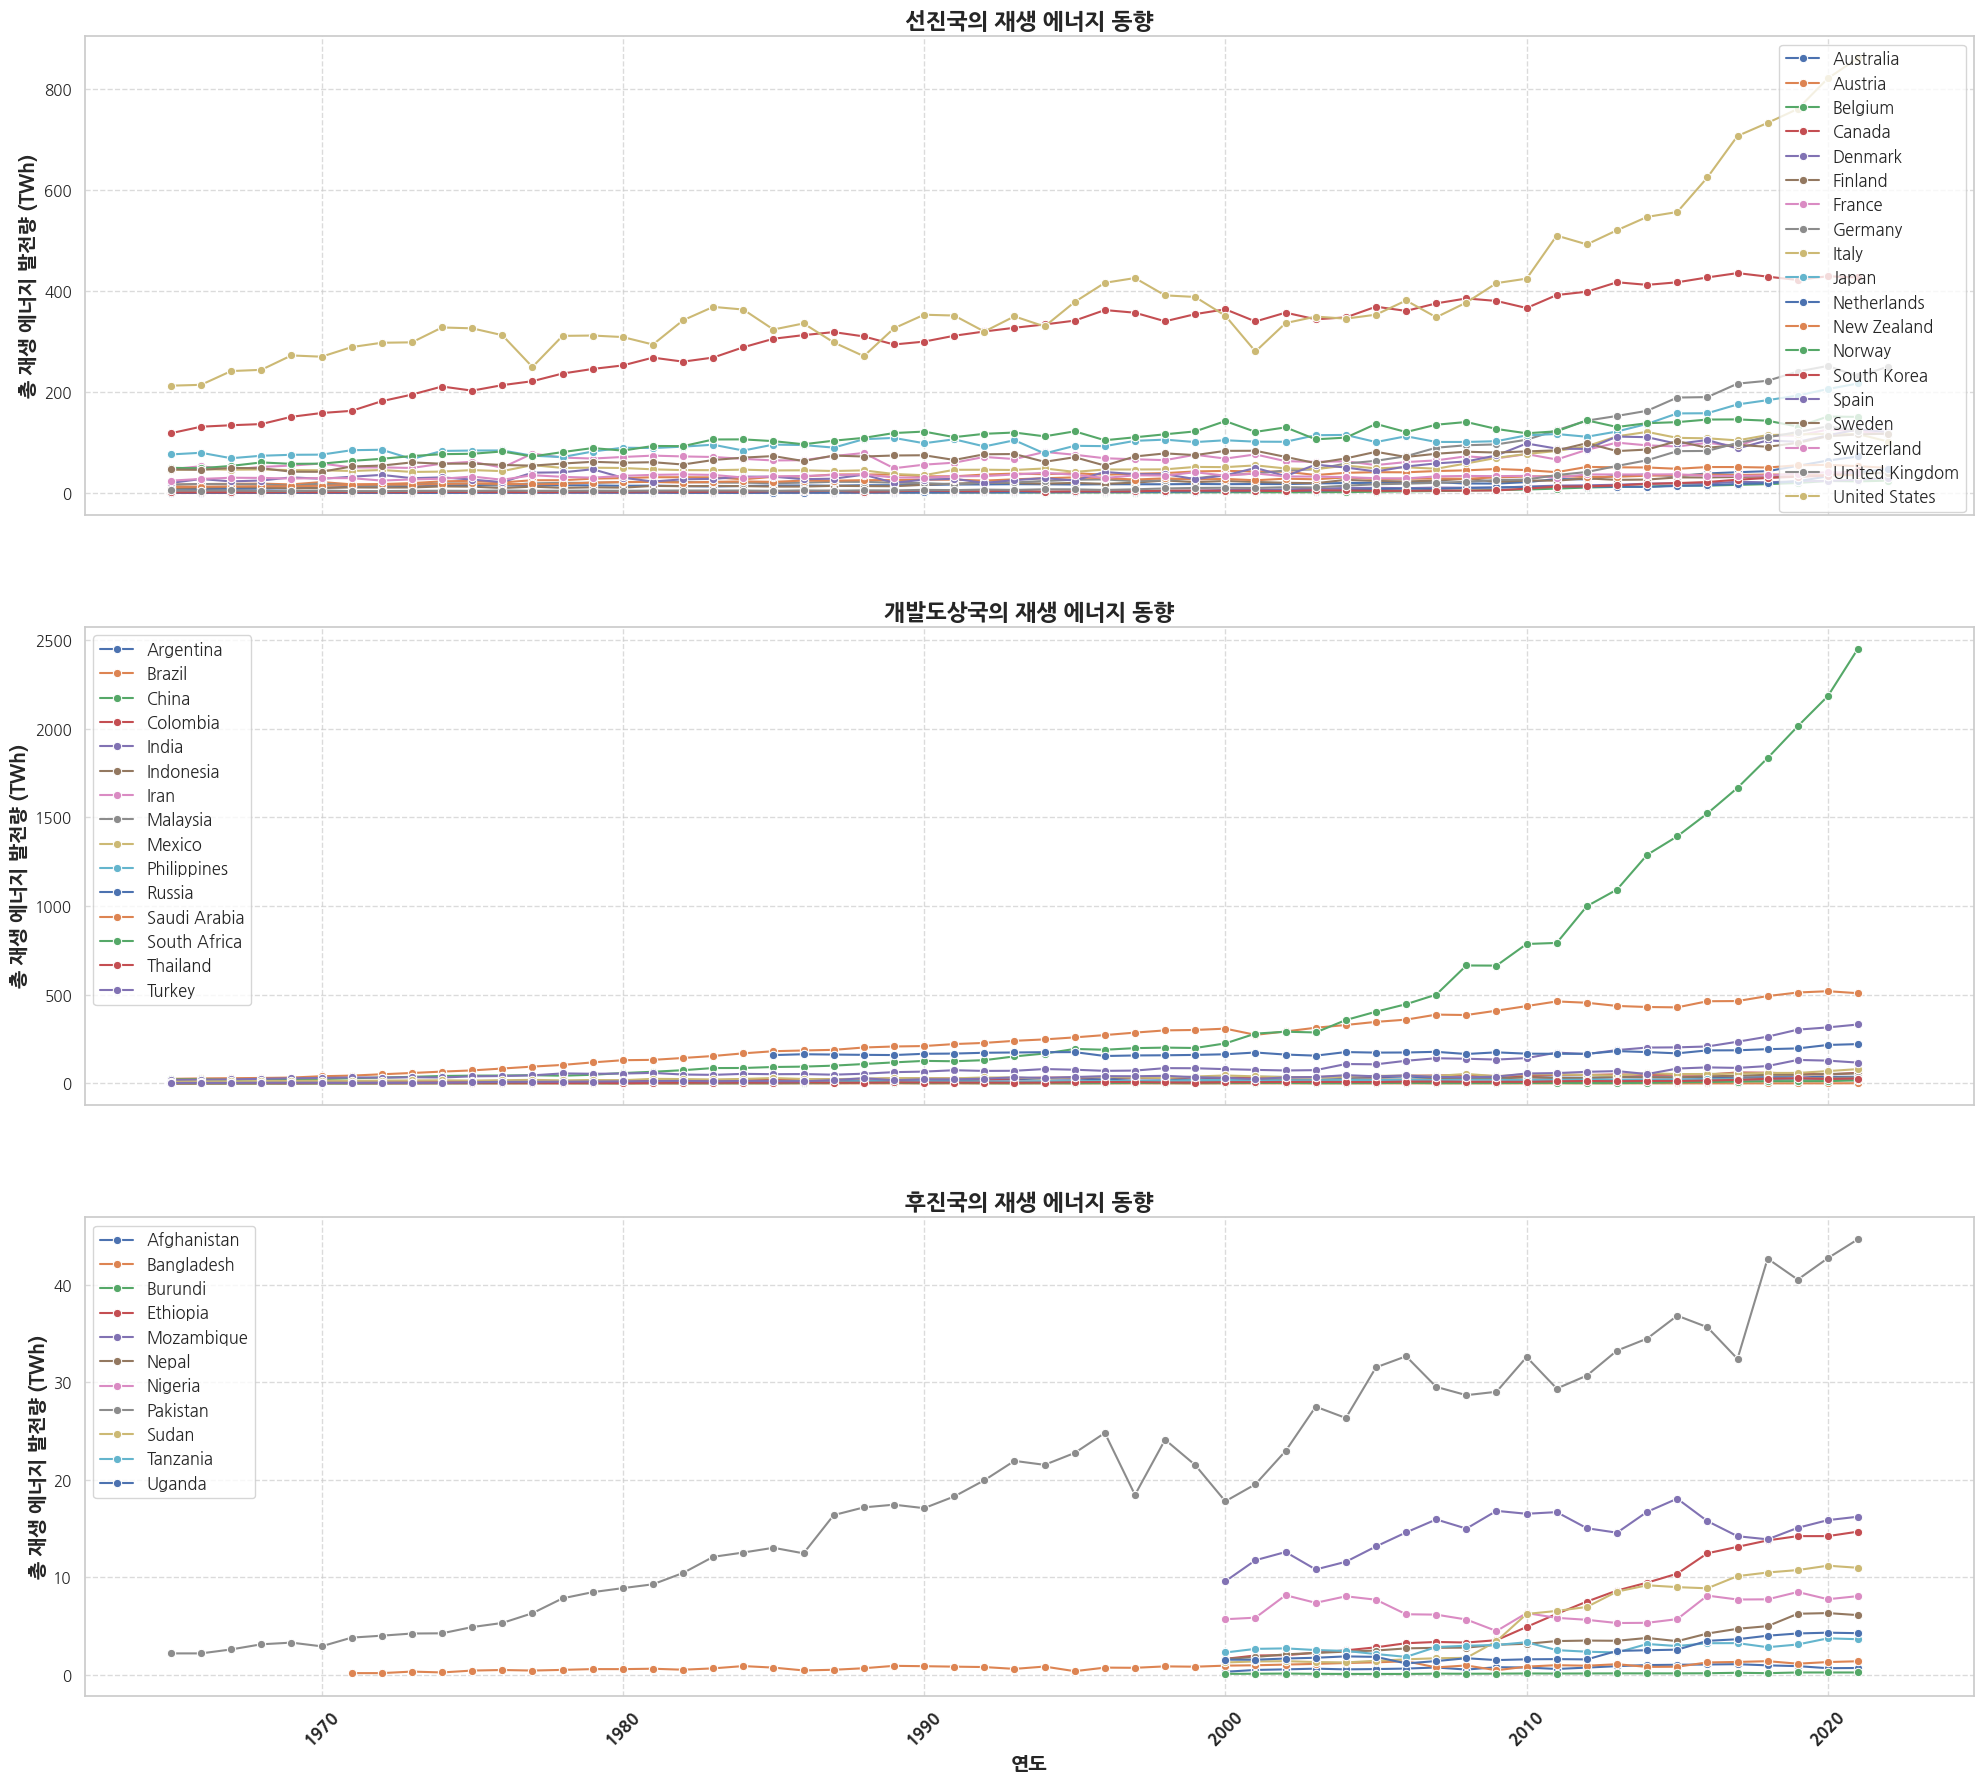

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# (이미 df_3가 전처리되어 있다고 가정)
# df_3에는 'Entity', 'Year', 'Total Renewable (TWh)' 열이 포함되어 있어야 합니다.

# 국가 분류 리스트 (제공하신 자료 기준)
advanced_countries = [
    "United States", "Canada", "Japan", "Germany", "United Kingdom", "France",
    "South Korea", "Australia", "New Zealand", "Switzerland", "Sweden",
    "Norway", "Denmark", "Finland", "Italy", "Spain", "Netherlands", "Austria", "Belgium"
]

developing_countries = [
    "China", "India", "Brazil", "Russia", "Mexico", "Indonesia", "Turkey",
    "South Africa", "Argentina", "Saudi Arabia", "Iran", "Thailand", "Malaysia",
    "Colombia", "Philippines"
]

underdeveloped_countries = [
    "Pakistan", "Bangladesh", "Nigeria", "Ethiopia", "DR Congo", "Afghanistan",
    "Nepal", "Uganda", "Tanzania", "Sudan", "Mozambique", "Burundi"
]

# 각 그룹별 데이터 추출
df_advanced = df_3[df_3['Entity'].isin(advanced_countries)]
df_developing = df_3[df_3['Entity'].isin(developing_countries)]
df_underdeveloped = df_3[df_3['Entity'].isin(underdeveloped_countries)]

# 3개의 그룹을 각각 하나의 서브플롯으로 시각화 (세로 3행 1열 배치)
fig, axes = plt.subplots(3, 1, figsize=(20, 18), sharex=True)
groups = [("선진국", df_advanced), ("개발도상국", df_developing), ("후진국", df_underdeveloped)]

for ax, (group_name, df_group) in zip(axes, groups):
    for country in df_group['Entity'].unique():
        country_data = df_group[df_group['Entity'] == country]
        sns.lineplot(x='Year', y='Total Renewable (TWh)', data=country_data, marker='o', ax=ax, label=country)
    ax.set_title(f'{group_name}의 재생 에너지 동향', fontsize=16, fontweight='bold')
    ax.set_xlabel('연도', fontsize=14, fontweight='bold')
    ax.set_ylabel('총 재생 에너지 발전량 (TWh)', fontsize=14, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=12)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


선진국, 개발도상국, 후진국들의 재생 에너지 동향에 대한 그래프

In [ ]:
global_renewable_production = df_3.groupby('Year')[energy_types].sum()

renewable_share = global_renewable_production.div(global_renewable_production.sum(axis=1), axis=0) * 100

colors = px.colors.qualitative.Plotly

fig = px.line(
    renewable_share,
    x=renewable_share.index,
    y=energy_types,
    labels={'index': 'Year', 'value': 'Percentage in Total Production (%)'},
    title='재생 가능 에너지원의 시간에 따른 생산량 비율'
)

for i, energy_type in enumerate(energy_types):
    fig.data[i].line.color = colors[i]

fig.update_layout(legend_title_text='Energy Sources')
fig.show()

그래프 분석: 이 선 그래프는 다양한 재생 에너지원(풍력, 수력, 태양광 및 기타 재생 에너지) 간의 관계를 시간에 따른 전체 글로벌 재생 에너지 생산량의 비율로 나타냅니다. 각 에너지 유형은 뚜렷한 색상의 선으로 표시되어 전체 재생 에너지 믹스에서 차지하는 비중을 보여줍니다. 그래프는 각 재생 에너지원이 전체 에너지 생산에 기여하는 기여도가 해마다 어떻게 변화했는지를 강조합니다. 이는 재생 에너지 부문에서 변화하는 역학 관계를 명확하게 이해할 수 있으며, 어떤 에너지원이 주목받고 있는지와 다양한 유형의 재생 에너지 간의 균형이 어떻게 변화하고 있는지를 보여줍니다. 이 분석은 재생 에너지의 글로벌 트렌드를 이해하고 에너지 정책을 전략적으로 계획하는 데 필수적입니다.

 터키의 재생에너지 발전 결과를 별도로 살펴보는 이유는, 터키가 유럽과 지리적으로 인접해 있고, 에너지 전환 및 재생에너지 투자 측면에서 유럽 국가들과 비교할 만한 흥미로운 사례를 제공하기 때문입니다.
즉, 터키의 재생에너지 발전 현황을 유럽 내 다른 국가들과 비교함으로써, 터키의 에너지 전환 전략이나 정책 효과를 평가하고, 지역 내 경쟁력을 분석하려는 목적

In [ ]:
turkey_data = df_3[df_3['Entity'] == 'Turkey']

start_year = 2000
end_year = 2023

data_year_range = turkey_data[(turkey_data['Year'] >= start_year) & (turkey_data['Year'] < end_year)]

sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

energy_production = data_year_range[sources].sum()

energy_df = pd.DataFrame({'Source': sources, 'Production': energy_production})
energy_df = energy_df.sort_values(by='Production', ascending=False)

fig = px.bar(
    energy_df,
    x='Source',
    y='Production',
    title=f"튀르키예의 에너지원별 전력 생산 {start_year}-{end_year-1}",
    labels={'Production': 'Electricity Generation (TWh)'}
)

colors = px.colors.qualitative.Plotly[:len(sources)]
fig.update_traces(marker=dict(color=colors))

fig.show()

그래프 분석: 이 막대 차트는 2000년부터 2022년까지 다양한 재생 가능 에너지원으로부터 튀르키예의 전력 생산량을 보여줍니다.
이 막대 차트는 풍력, 수력, 태양광 및 바이오 에너지를 포함한 기타 재생 가능 에너지원으로부터 테라와트시(TWh) 단위의 생산량을 자세히 설명합니다.
각 소스는 쉽게 구분할 수 있도록 색상으로 구분된 막대로 표시됩니다. 이 차트는 이 기간 동안 튀르키예에서 가장 생산적인 재생 에너지원을 명확하게 보여줍니다.
이는 국가의 에너지 믹스와 재생 에너지 우선순위를 이해하는 데 도움이 되며, 다양한 소스가 전체 에너지 환경에 어떻게 기여하는지 보여줍니다.
이 시각화는 재생 에너지 분야에서 튀르키예의 발전을 분석하고 전략적인 에너지 계획 및 정책 수립에 매우 중요합니다.

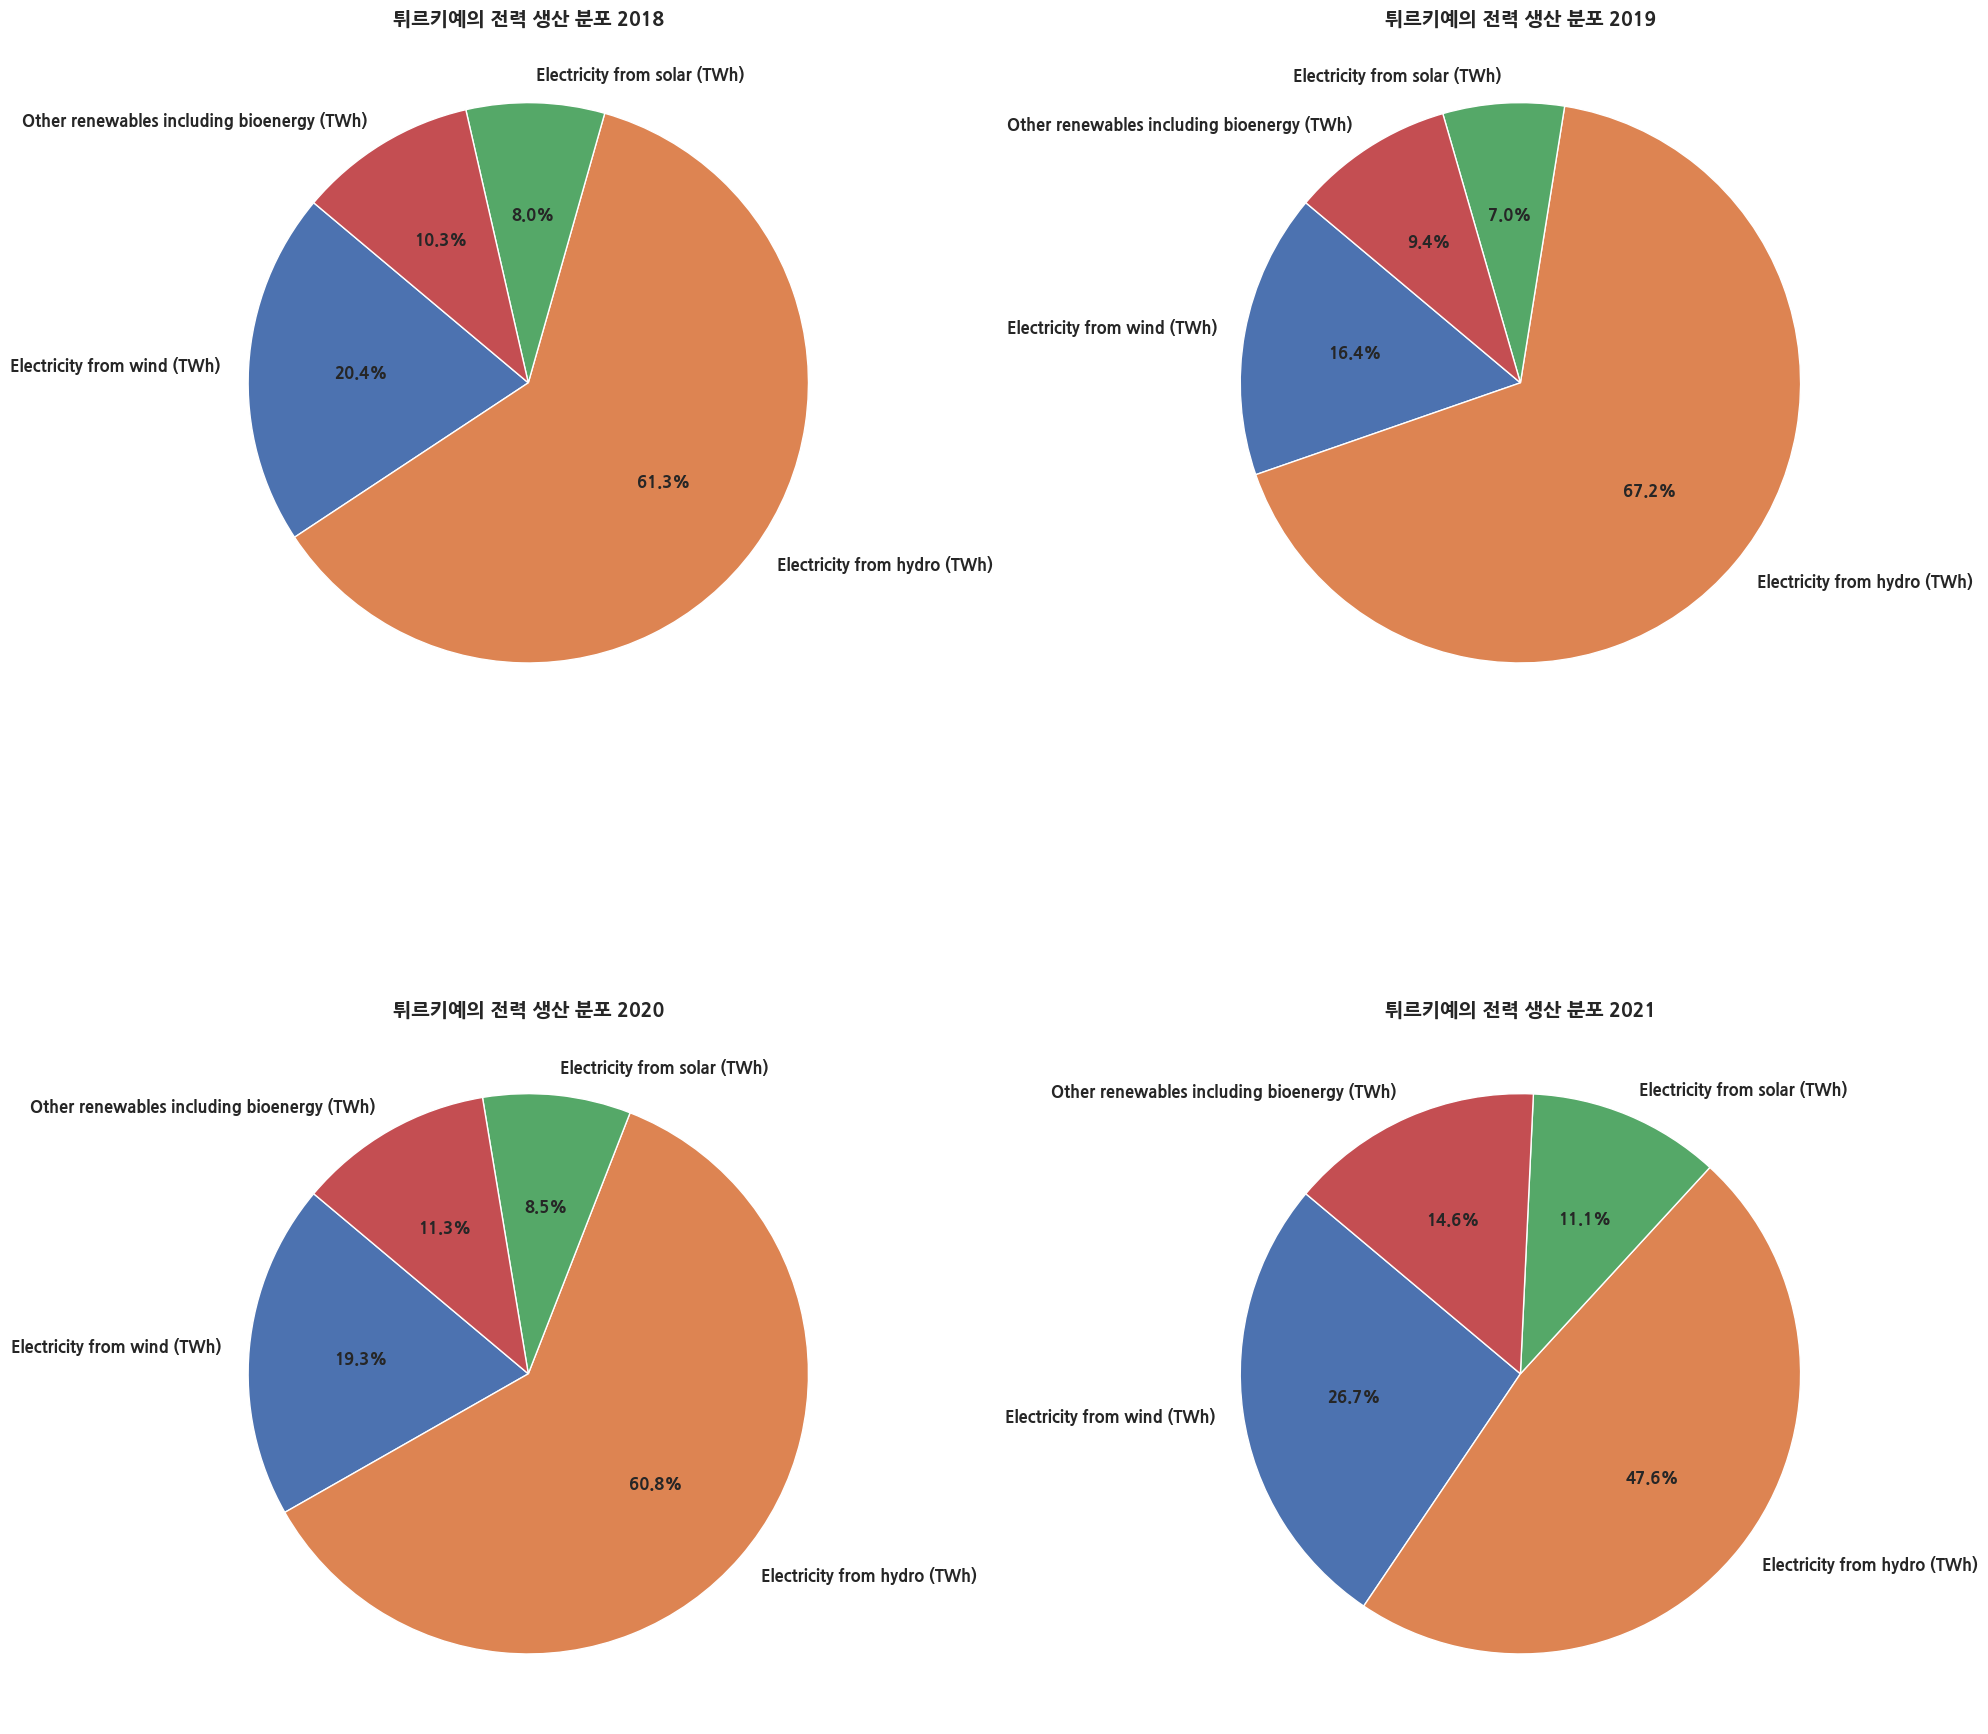

In [ ]:
sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

turkey_data = df_3[df_3['Entity'] == 'Turkey']

years = [2018, 2019, 2020, 2021]

plt.figure(figsize=(20, 20))
for i, year in enumerate(years):
    data_year = turkey_data[turkey_data['Year'] == year]
    energy_production = data_year[sources].values[0]
    plt.subplot(2, 2, i+1)
    patches, texts, autotexts = plt.pie(energy_production, labels=sources, autopct='%1.1f%%', startangle=140)

    for text in texts:
        text.set_fontsize(12)
        text.set_weight('bold')
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_weight('bold')

    plt.title(f'튀르키예의 전력 생산 분포 {year}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


그래프 분석: 이 일련의 파이 차트는 2018년, 2019년, 2020년, 2021년 동안 튀르키예의 재생 가능 에너지원으로부터의 전력 생산량을 연도별로 분석한 것입니다. 각 차트는 특정 연도의 풍력, 수력, 태양광 및 바이오 에너지를 포함한 기타 재생 가능 에너지원에서 생성된 전력의 비율 분포를 나타냅니다. 데이터는 시각적으로 매력적인 형식으로 제공되며, 파이 차트의 각 부문이 라벨링되고 정량화되어 각 에너지원의 기여도를 매년 쉽게 비교할 수 있습니다. 대담하고 명확한 라벨은 튀르키예의 재생 가능 에너지 믹스 변화를 신속하게 파악하는 데 도움이 됩니다. 이 시각화는 튀르키예의 지속 가능한 에너지로의 여정에서 에너지 선호도와 정책 영향의 변화를 관찰하는 데 유용합니다.

In [ ]:
renewable_sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']
selected_year = 2021
countries = ['Turkey', 'Germany', 'United Kingdom', 'Greece', 'France', 'Italy', 'Spain', 'Netherlands', 'Sweden', 'Poland', 'Portugal']

filtered_data = df_3[(df_3['Year'] == selected_year) & (df_3['Entity'].isin(countries))]

fig = px.bar(filtered_data, x='Entity', y=renewable_sources,
             title=f'유럽 국가들의 발전량 비교 {selected_year}',
             labels={'Entity': 'Countries', 'value': 'Electricity Generation (TWh)'},
             color_discrete_sequence=['green', 'blue', 'yellow', 'brown'])

fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Electricity Generation (TWh)',
                  title_font=dict(size=20))

fig.show()

그래프 분석: 이 막대 차트는 2021년 한 해 동안 여러 유럽 국가의 다양한 재생 가능 에너지원에서 발생하는 전력 생산을 비교하여 보여줍니다. 포함된 국가는 튀르키예, 독일, 영국, 그리스, 프랑스, 이탈리아, 스페인, 네덜란드, 스웨덴, 폴란드, 포르투갈입니다. 각 막대는 풍력, 수력, 태양광 및 바이오 에너지를 포함한 기타 재생 가능 에너지 등 다양한 재생 가능 에너지원이 테라와트시(TWh) 내 총 전력 생산량에 기여하는 바를 보여주기 위해 분할됩니다. 각 막대 내의 뚜렷한 색상 세그먼트는 각 국가의 에너지 믹스를 명확하게 시각적으로 표현하여 다양한 재생 가능 에너지원에 대한 다양성과 의존도를 강조합니다. 이 차트는 특히 유럽의 재생 가능 에너지 환경을 이해하는 데 유용하며, 국가마다 다양한 형태의 재생 가능 에너지를 우선시하고 개발하는 방식을 보여줍니다.

In [ ]:
selected_year = 2021
neighboring_countries = ['Turkey', 'Greece', 'Bulgaria', 'Georgia', 'Armenia', 'Azerbaijan', 'Iran', 'Iraq', 'Syria']
renewable_sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

filtered_data = df_3[(df_3['Year'] == selected_year) & (df_3['Entity'].isin(neighboring_countries))]

colors = ['green', 'blue', 'yellow', 'brown']

fig = px.bar(filtered_data, x='Entity', y=renewable_sources,
             title=f'튀르키예의 전력 생산량과 인근 국가들의 비교 {selected_year}',
             labels={'Entity': 'Countries', 'value': 'Electricity Generation (TWh)'},
             color_discrete_sequence=colors)

fig.update_layout(xaxis_tickangle=-45, xaxis_title=None, yaxis_title='Electricity Generation (TWh)',
                  title_font=dict(size=20))

fig.show()

그래프 분석: 이 막대 차트는 2021년 튀르키예와 그 인근 국가들(그리스, 불가리아, 조지아, 아르메니아, 아제르바이잔, 이란, 이라크, 시리아)의 재생 가능 에너지원에서 발생하는 전력 생산량을 비교 분석한 것입니다. 각 국가의 총 전력 생산량은 풍력, 수력, 태양광, 바이오 에너지를 포함한 기타 재생 가능 에너지 등 다양한 재생 가능 에너지원을 나타내는 세그먼트로 나뉩니다. 색상으로 구분된 막대를 사용하면 각 국가의 에너지 믹스와 재생 가능 에너지 생산 규모를 쉽게 비교할 수 있습니다. 이 시각화는 인접 국가들 간의 재생 가능 에너지 채택 정도가 다양함을 강조하고 지역 에너지 전략과 자원 활용에 대한 인사이트를 제공합니다. 이 차트는 지역 전반에 걸친 재생 가능 에너지 배치의 다양성을 강조하며, 이는 다양한 지리적, 기후적, 정책적 영향을 반영합니다.

In [ ]:
energy_sources = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                  'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_generation = df_3[energy_sources].sum()
total_generation = total_generation.sort_values(ascending=False)

total_generation_df = pd.DataFrame({'Energy Source': total_generation.index, 'Electricity Generation (TWh)': total_generation.values})

colors = {
    'Electricity from wind (TWh)': 'green',
    'Electricity from hydro (TWh)': 'blue',
    'Electricity from solar (TWh)': 'yellow',
    'Other renewables including bioenergy (TWh)': 'brown',
}

total_generation_df['Color'] = total_generation_df['Energy Source'].map(colors)

fig = px.bar(total_generation_df, x='Energy Source', y='Electricity Generation (TWh)',
             title='에너지원별 전력 생산',
             labels={'Energy Source': 'Energy Source', 'Electricity Generation (TWh)': 'Electricity Generation (TWh)'},
             color='Color')

fig.update_layout(title_font=dict(size=20),
                  xaxis_title_font=dict(size=16),
                  yaxis_title_font=dict(size=16))

fig.show()

그래프 분석: 이 막대 차트는 다양한 재생 에너지원에서 발생하는 총 전력 생산량을 시각화합니다. 이 차트는 전 세계 생산량을 풍력, 수력, 태양광 및 바이오 에너지를 포함한 기타 재생 에너지원으로 분류합니다. 각 카테고리는 서로 다른 색상으로 표시되어 명확한 시각적 구분을 제공합니다. 차트는 총 전력 생산량을 테라와트시(TWh)로 기준으로 에너지원을 순위 매기므로 각 에너지원의 상대적 기여도를 쉽게 비교할 수 있습니다. 이 시각화는 글로벌 에너지 믹스에서 특정 재생 에너지원의 지배력이나 유병률을 효과적으로 강조합니다. 재생 에너지 생산 현황에 대한 귀중한 인사이트를 제공하며 향후 에너지 정책 및 투자에 잠재적으로 성장하거나 집중할 수 있는 분야를 나타냅니다.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.

<ipython-input-161-580ae17e6ff5>:41: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.

<ip

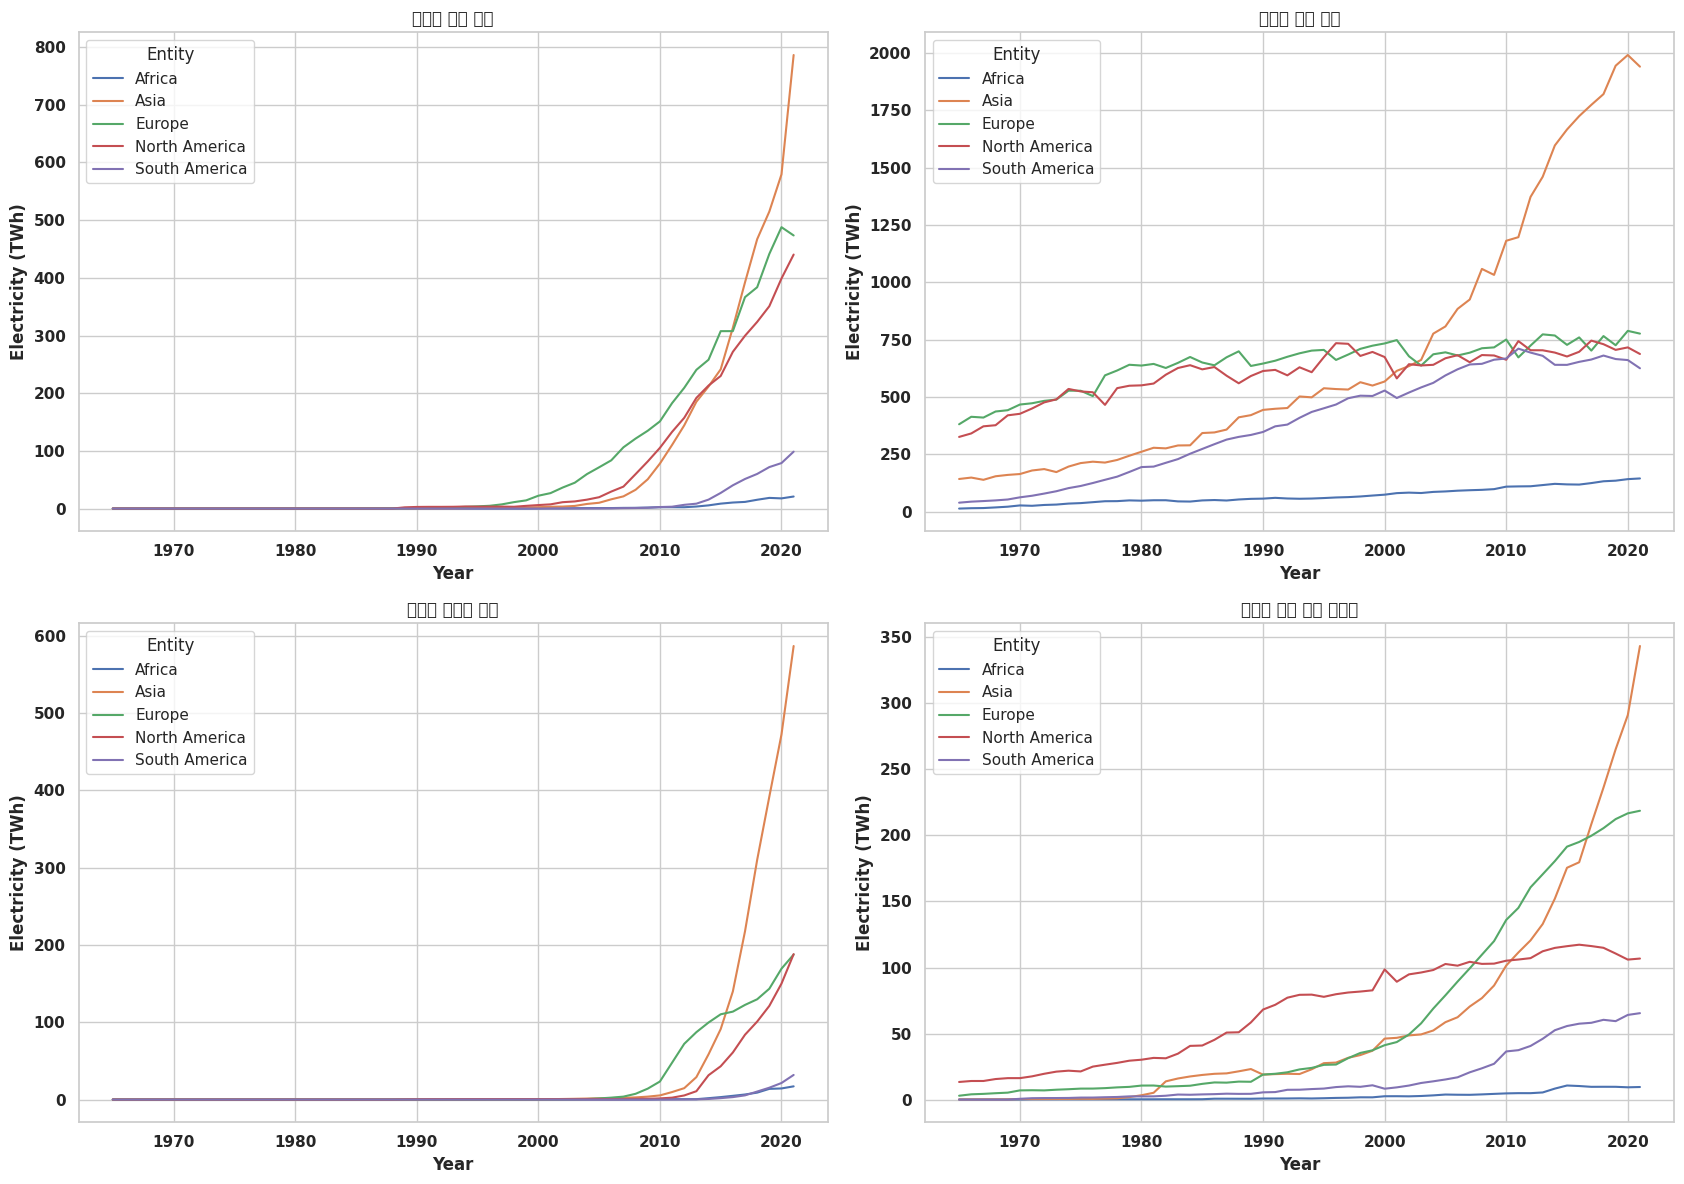

In [ ]:
selected_regions = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
filtered_data = df_3[df_3['Entity'].isin(selected_regions)]

grouped_data = filtered_data.groupby(['Year', 'Entity']).sum().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(17, 12))

plt.subplot(2, 2, 1)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from wind (TWh)', hue='Entity')
plt.title('지역별 풍력 발전', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 2)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from hydro (TWh)', hue='Entity')
plt.title('지역별 수력 발전', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 3)
sns.lineplot(data=grouped_data, x='Year', y='Electricity from solar (TWh)', hue='Entity')
plt.title('지역별 태양열 발전', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplot(2, 2, 4)
sns.lineplot(data=grouped_data, x='Year', y='Other renewables including bioenergy (TWh)', hue='Entity')
plt.title('지역별 기타 재생 에너지', fontweight='bold')
plt.ylabel('Electricity (TWh)', fontweight='bold')
plt.xlabel('Year', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.tight_layout()
plt.show()

그래프 분석: 이 네 개의 선 그래프 세트는 아프리카, 아시아, 유럽, 북미, 남미 등 다양한 지역에서 다양한 재생 가능 에너지원으로부터 전력을 생산하는 과정을 보여줍니다. 각 그래프는 풍력, 수력, 태양광 및 바이오 에너지를 포함한 기타 재생 가능 에너지의 한 유형에 초점을 맞춥니다. 그래프는 이러한 에너지원으로부터 수년에 걸쳐 테라와트시(TWh) 단위의 연간 전력 생산량을 추적하며, 지역별로 차별화됩니다. 데이터는 각 지역마다 고유한 색상으로 제공되므로 서로 다른 지역의 추세를 쉽게 추적하고 비교할 수 있습니다. 이 그래프는 다양한 지역이 다양한 재생 가능 에너지원을 어떻게 활용하고 있는지에 대한 포괄적인 개요를 제공하며, 이는 지역의 성장, 잠재력 및 지역 선호도를 나타냅니다. 시각화는 전 세계적으로 재생 가능 에너지에 대한 다양한 접근 방식을 효과적으로 보여주고 특정 재생 가능 부문에서 선도적이거나 떠오르는 지역을 강조합니다.

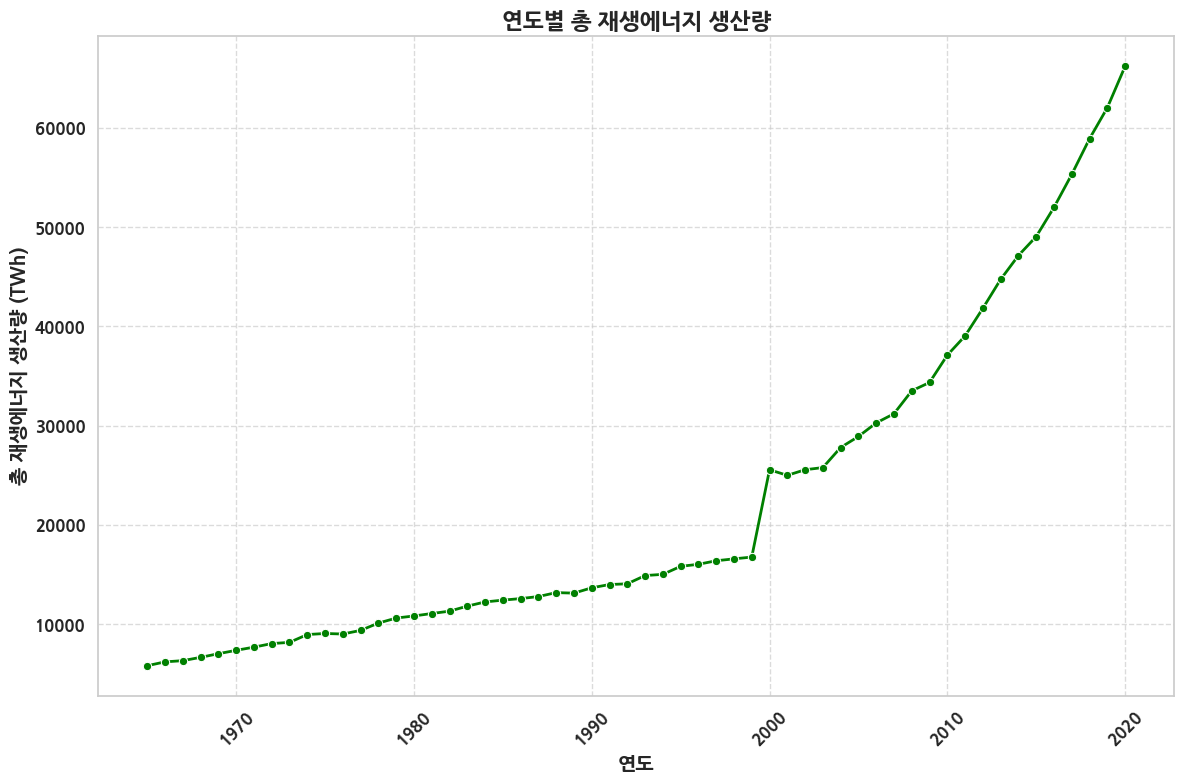

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. CSV 파일 불러오기 및 전처리
df_3 = pd.read_csv("/content/03 modern-renewable-prod.csv")
df_3.columns = df_3.columns.str.strip()  # 컬럼명 앞뒤 공백 제거

# 'Entity'와 'Year' 열이 존재하는 행만 사용
df_3 = df_3.dropna(subset=['Entity', 'Year'])
df_3['Year'] = pd.to_numeric(df_3['Year'], errors='coerce')
df_3 = df_3.dropna(subset=['Year'])
df_3['Year'] = df_3['Year'].astype(int)

# 2. 재생에너지 관련 열 숫자형 변환 및 결측치 0 처리
energy_types = [
    'Electricity from wind (TWh)',
    'Electricity from hydro (TWh)',
    'Electricity from solar (TWh)',
    'Other renewables including bioenergy (TWh)'
]
for col in energy_types:
    if col in df_3.columns:
        df_3[col] = pd.to_numeric(df_3[col], errors='coerce').fillna(0)
    else:
        df_3[col] = 0

# 3. 총 재생에너지 생산량(TWh) 계산
df_3['Total Renewable (TWh)'] = df_3[energy_types].sum(axis=1)

# 4. 2020년까지 데이터만 사용
df_3 = df_3[df_3['Year'] <= 2020]

# 5. 연도별 총 생산량 합산 (실제 관측치)
yearly_data = df_3.groupby('Year')['Total Renewable (TWh)'].sum().reset_index()

# 6. 전체 연도 범위 생성 (예: 최소 연도부터 2020년까지)
min_year = yearly_data['Year'].min()
max_year = 2020  # 최대 연도: 2020년
all_years = pd.DataFrame({'Year': range(min_year, max_year + 1)})

# 7. 병합하여 실제 관측치가 없는 연도는 NaN으로 남김
merged = pd.merge(all_years, yearly_data, on='Year', how='left')

# 8. 선형 보간을 통해 누락된 연도의 값을 채움 (단, 보간은 관측된 값 사이만 이루어짐)
merged['Total Renewable (TWh)'] = merged['Total Renewable (TWh)'].interpolate(method='linear')

# 9. 실제 관측 데이터와 보간 결과를 함께 시각화
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged, x='Year', y='Total Renewable (TWh)', marker='o', color='green', linewidth=2)
plt.title('연도별 총 재생에너지 생산량', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14, fontweight='bold')
plt.ylabel('총 재생에너지 생산량 (TWh)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


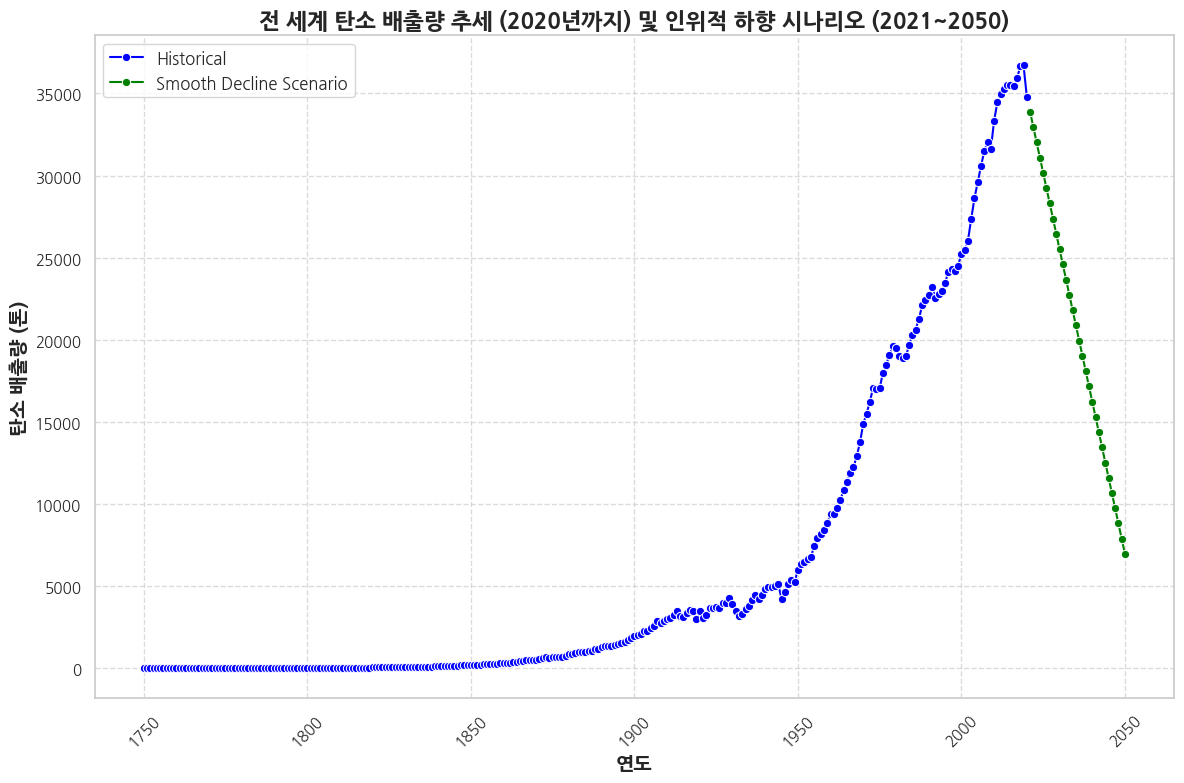

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df_co2 = pd.read_csv('/content/owid-co2-data.csv')
df_co2 = df_co2.dropna(subset=['year', 'country', 'co2'])
df_co2['year'] = pd.to_numeric(df_co2['year'], errors='coerce').astype(int)

# 전 세계 데이터
if 'World' in df_co2['country'].unique():
    df_world = df_co2[df_co2['country'] == 'World'].copy()
else:
    df_world = df_co2.groupby('year', as_index=False)['co2'].sum()

df_world = df_world.sort_values('year')

# 2. 2020년까지의 역사적 데이터만 사용
historical = df_world[df_world['year'] <= 2020].copy()

# 3. 2020년 배출량(피크) 확인
peak_co2 = historical[historical['year'] == 2020]['co2'].values[0]

# 4. 2050년까지 "부드러운 하향" 시나리오 생성
#    예) 2020~2050 사이에 선형으로 80% 감소 (피크의 20% 수준으로 떨어진다고 가정)
future_years = np.arange(2021, 2051)
num_future = len(future_years)

# 여기서 2050년에 피크의 20%가 된다고 가정 -> linear decline
target_2050 = peak_co2 * 0.20  # 80% 감소
smooth_decline = []
for i, year in enumerate(future_years):
    # t=0일 때 = 2020년, t=30일 때 = 2050년
    t = year - 2020
    ratio = t / (2050 - 2020)  # 0~1 사이
    # 선형 보간: 2020년 peak_co2 -> 2050년 target_2050
    co2_val = peak_co2 + (target_2050 - peak_co2) * ratio
    smooth_decline.append(co2_val)

# 시나리오를 DataFrame으로
df_scenario = pd.DataFrame({
    'year': future_years,
    'co2': smooth_decline
})

# 5. 시각화
plt.figure(figsize=(12,8))
# (A) 실제 역사적 데이터
sns.lineplot(x='year', y='co2', data=historical, marker='o', color='blue', label='Historical')

# (B) 인위적 "부드러운 하향" 시나리오
sns.lineplot(x='year', y='co2', data=df_scenario, marker='o', color='green', label='Smooth Decline Scenario')

plt.title("전 세계 탄소 배출량 추세 (2020년까지) 및 인위적 하향 시나리오 (2021~2050)", fontsize=16, fontweight='bold')
plt.xlabel("연도", fontsize=14, fontweight='bold')
plt.ylabel("탄소 배출량 (톤)", fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


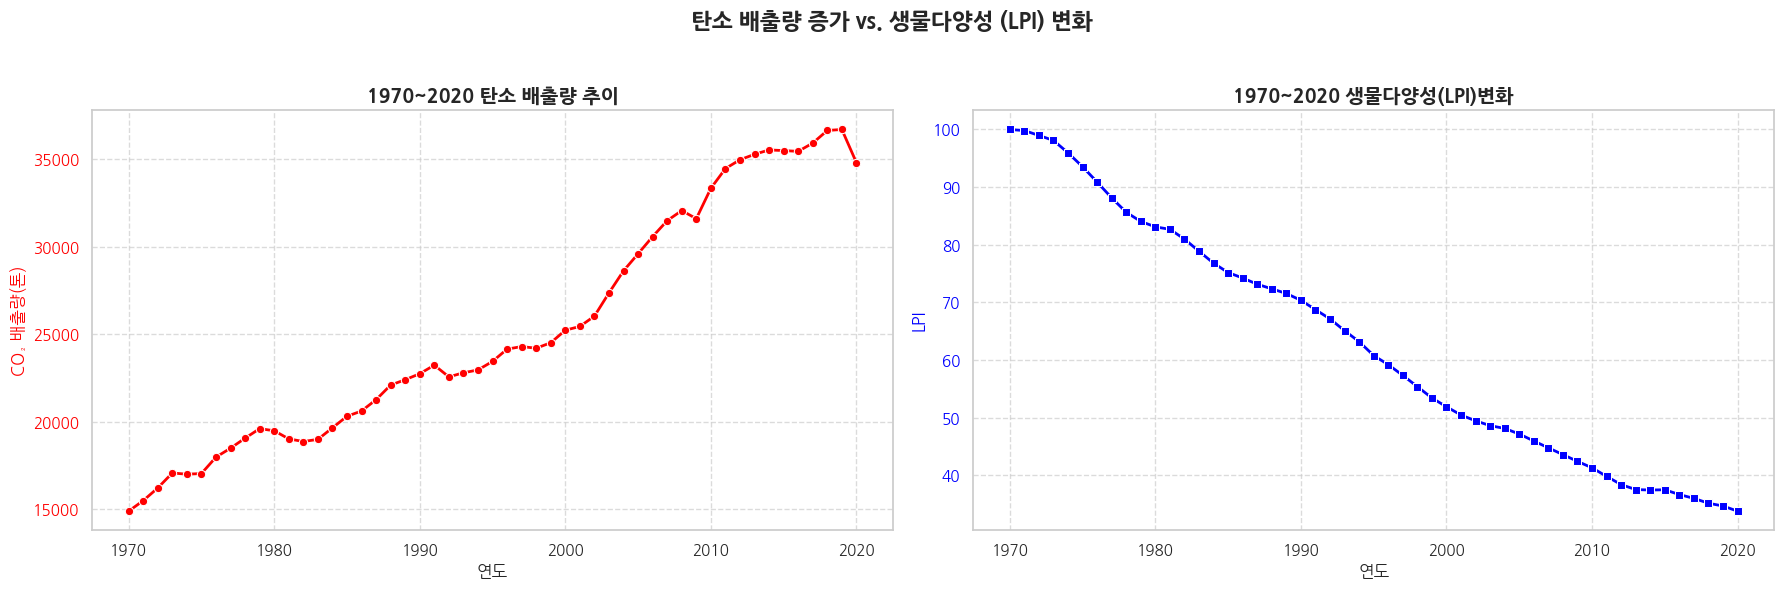

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn, Matplotlib 테마 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

#############################
# 1. OWID CO₂ 데이터 불러오기
#############################
df_co2 = pd.read_csv('/content/owid-co2-data.csv')
# 필요한 열만 남기기 (year, country, co2)
df_co2 = df_co2[['year','country','co2']].dropna(subset=['year','country','co2'])
df_co2['year'] = pd.to_numeric(df_co2['year'], errors='coerce').astype(int)

# 전 세계 데이터만 골라서 연도별 합산 (만약 'World' 행이 있다면 그 행만)
if 'World' in df_co2['country'].unique():
    df_world_co2 = df_co2[df_co2['country'] == 'World'].copy()
else:
    # 국가별 합산
    df_world_co2 = df_co2.groupby('year', as_index=False)['co2'].sum()

# 1970~2020 범위로 제한
df_world_co2 = df_world_co2[(df_world_co2['year'] >= 1970) & (df_world_co2['year'] <= 2020)]
# 연도별로 중복 행이 없는지 확인 (보통 1행씩만 있을 것)
df_world_co2 = df_world_co2.sort_values('year').drop_duplicates('year')
df_world_co2.rename(columns={'year': 'Year', 'co2': 'CO₂ 배출량(톤)'}, inplace=True)

#############################
# 2. LPI 데이터 불러오기
#############################
df_lpi = pd.read_csv('/content/global-living-planet-index.csv')
df_lpi.columns = df_lpi.columns.str.strip()

# 실제 열 이름 확인 후 맞추기 (예: Year, LPI)
# 여기서는 Year, LPI라 가정
df_lpi = df_lpi[['Year','Living Planet Index']].dropna(subset=['Year','Living Planet Index'])
df_lpi['Year'] = pd.to_numeric(df_lpi['Year'], errors='coerce').astype(int)

# 1970~2020 범위로 제한
df_lpi = df_lpi[(df_lpi['Year'] >= 1970) & (df_lpi['Year'] <= 2020)]
# 혹시 연도별 중복 있다면 평균 처리
df_lpi = df_lpi.groupby('Year', as_index=False)['Living Planet Index'].mean().sort_values('Year')

#############################
# 3. 병합
#############################
merged = pd.merge(df_world_co2, df_lpi, on='Year', how='inner').sort_values('Year')

# 병합 결과 점검
# print(merged.head(10))
# print(merged.tail(10))

#############################
# 4. 시각화 (2개 서브플롯)
#############################
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharex=True)

# (A) 왼쪽: CO₂ 배출량(톤)
sns.lineplot(data=merged, x='Year', y='CO₂ 배출량(톤)', ax=ax1, marker='o', color='red', linewidth=2)
ax1.set_title('1970~2020 탄소 배출량 추이', fontsize=14, fontweight='bold')
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('CO₂ 배출량(톤)', fontsize=12, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, linestyle='--', alpha=0.7)

# (B) 오른쪽: Living Planet Index
sns.lineplot(data=merged, x='Year', y='Living Planet Index', ax=ax2, marker='s', color='blue', linewidth=2)
ax2.set_title('1970~2020 생물다양성(LPI)변화', fontsize=14, fontweight='bold')
ax2.set_xlabel('연도', fontsize=12)
ax2.set_ylabel('LPI', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('탄소 배출량 증가 vs. 생물다양성 (LPI) 변화', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


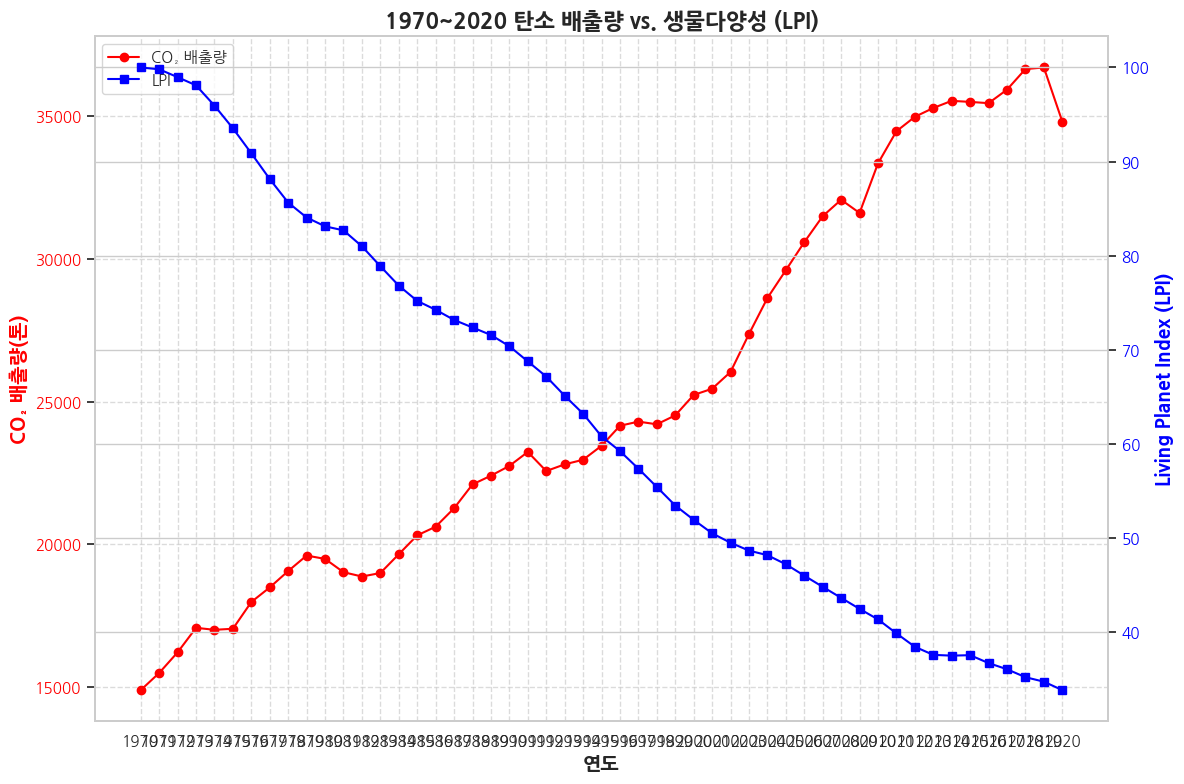

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(12, 8))

# 왼쪽 y축 (CO₂ 배출량)
color_co2 = 'red'
ax1.set_xlabel('연도', fontsize=14, fontweight='bold')
ax1.set_ylabel('CO₂ 배출량(톤)', fontsize=14, fontweight='bold', color=color_co2)
line1 = ax1.plot(merged['Year'], merged['CO₂ 배출량(톤)'], marker='o', color=color_co2, label='CO₂ 배출량')
ax1.tick_params(axis='y', labelcolor=color_co2)
ax1.grid(True, linestyle='--', alpha=0.7)

# 오른쪽 y축 (LPI)
ax2 = ax1.twinx()
color_lpi = 'blue'
ax2.set_ylabel('Living Planet Index (LPI)', fontsize=14, fontweight='bold', color=color_lpi)
line2 = ax2.plot(merged['Year'], merged['Living Planet Index'], marker='s', color=color_lpi, label='LPI')
ax2.tick_params(axis='y', labelcolor=color_lpi)

# 범례 병합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('1970~2020 탄소 배출량 vs. 생물다양성 (LPI)', fontsize=16, fontweight='bold')
plt.xticks(merged['Year'], rotation=45)
plt.tight_layout()
plt.show()


In [182]:
import pandas as pd

df_lpi = pd.read_csv("/content/global-living-planet-index.csv")
print(df_lpi.head())
print(df_lpi.columns)


   Entity Code  Year  Living Planet Index  Upper confidence interval of Living Planet Index  \
0  Africa  NaN  1970              100.000                                           100.000   
1  Africa  NaN  1971               94.005                                           103.678   
2  Africa  NaN  1972               89.997                                           105.998   
3  Africa  NaN  1973               89.675                                           109.675   
4  Africa  NaN  1974               85.613                                           109.107   

   Lower confidence interval of Living Planet Index  
0                                           100.000  
1                                            86.478  
2                                            77.637  
3                                            74.525  
4                                            67.872  
Index(['Entity', 'Code', 'Year', 'Living Planet Index',
       'Upper confidence interval of Living Plane